# Conjunto de Dados: Satisfação de Passageiros Aéreos ✈️

Este conjunto de dados contém informações de passageiros de companhias aéreas, coletadas a partir de uma pesquisa de satisfação.  
O objetivo é prever se o passageiro está **satisfeito** ou **neutro/insatisfeito** com a companhia aérea.


## Variáveis Disponíveis

- **Gender**: masculino ou feminino.  
- **Customer Type**: cliente regular ou não regular.  
- **Age**: idade real do passageiro.  
- **Type of Travel**: pessoal ou a negócios.  
- **Class**: executiva, econômica, econômica plus.  
- **Flight distance**: distância percorrida no voo.  

## Variáveis de satisfação (escala de 0 a 5)  
> 0 significa *não classificado / não avaliado*.  

- **Inflight wifi service** - Serviço de Wi-Fi a bordo
- **Departure/Arrival time convenient** - Horário de partida/chegada conveniente  
- **Ease of Online booking** - Facilidade de reserva online
- **Gate location** - Localização do portão de embarque  
- **Food and dirnk** - Comida e bebida
- **Online boarding** - Embarque online
- **Seat confort** - Conforto do assento
- **Inflight entertainment** - Entretenimento a bordo
- **On-board service** -  Serviço a bordo  
- **Leg room service** - Espaço para as pernas
- **Baggage handling** - Manuseio de bagagem
- **Checkin service** - Serviço de check-in  
- **Inflight service** - Serviço de bordo
- **Cleanliness** - Limpeza

## Atrasos (em minutos)  
- **Departure delay in minutes** - Atraso na partida
- **Arrival delay in minutes** - Atraso na chegada

## Problema de Classificação

O objetivo é prever a qual categoria de satisfação o passageiro pertence:

- **Satisfaction** - Satisfeito  
- **Neutral or dissatisfied** - Neutro ou insatisfeito

Ou seja, trata-se de um problema de **classificação binária**.

##**BIBLIOTECAS USADAS**

In [1]:
import pandas as pd                                           #manipulação e análise de dados tabulares
import numpy as np
import seaborn as sns
import shap                                     #ferramenta de visualização de dados
import matplotlib.pyplot as plt                               #ferramenta de visualização de dados
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, make_scorer, recall_score, fbeta_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import warnings
warnings.filterwarnings("ignore")

## **COLETA DE DADOS**

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
print(f'Dimensão da tabela: {df.shape}')

Dimensão da tabela: (103904, 25)


In [4]:
print('Cada linha (instância) corresponde a um passageiro.')
print('\nCada coluna corresponde a uma característica do passageiro.')
df.head(2)

Cada linha (instância) corresponde a um passageiro.

Cada coluna corresponde a uma característica do passageiro.


Unnamed: 0     id Gender      Customer Type  Age   Type of Travel  \
0           0  70172   Male     Loyal Customer   13  Personal Travel   
1           1   5047   Male  disloyal Customer   25  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  

[2 rows x 25 columns]

## **Identificando as features e o target**

In [5]:
print(f'Variáveis explicativas (features): {df.loc[:, df.columns != "satisfaction"].columns.tolist()}')
print(f'Variável alvo (target): {df.columns[-1]}')

Variáveis explicativas (features): ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Variável alvo (target): satisfaction


## **Informações Gerais do Conjunto de dados**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

* Existem colunas com valores nulos. Vamos verificar quais colunas realizando uma contagem.

In [7]:
# Exibir a contagem de valores nulos por coluna
print("\n--- Contagem de Valores Nulos (df.isnull().sum()) ---")
print(df.isnull().sum())


--- Contagem de Valores Nulos (df.isnull().sum()) ---
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Ar

**Resumos estatístico das métricas básicas**

In [8]:
# Exibir um resumo estatístico das colunas numéricas
print("\n--- Resumo Estatístico (df.describe()) ---")
print(df.describe())


--- Resumo Estatístico (df.describe()) ---
          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                    

#**Análise Exploratória Visual (EDA) - univariada**

**Iniciando pelas variáveis numéricas**

In [9]:
#Para que as colunas Unnamed:0 e id não interfiram nas análises vamos remove-las do datafreme.
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [10]:
#Separar as features em numéricas e cateóricas
cat_cols = [    "Gender", "Customer Type", "Type of Travel", "Class",
    "Inflight wifi service", "Departure/Arrival time convenient",
    "Ease of Online booking", "Gate location", "Food and drink",
    "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness",
    "satisfaction"]
num_cols = [
    "Age", "Flight Distance",
    "Departure Delay in Minutes", "Arrival Delay in Minutes"
]

**Visão geral das principais métricas - variáveis numéricas**

In [11]:
df[num_cols].describe().round(1).T

count    mean    std   min    25%    50%  \
Age                         103904.0    39.4   15.1   7.0   27.0   40.0   
Flight Distance             103904.0  1189.4  997.1  31.0  414.0  843.0   
Departure Delay in Minutes  103904.0    14.8   38.2   0.0    0.0    0.0   
Arrival Delay in Minutes    103594.0    15.2   38.7   0.0    0.0    0.0   

                               75%     max  
Age                           51.0    85.0  
Flight Distance             1743.0  4983.0  
Departure Delay in Minutes    12.0  1592.0  
Arrival Delay in Minutes      13.0  1584.0

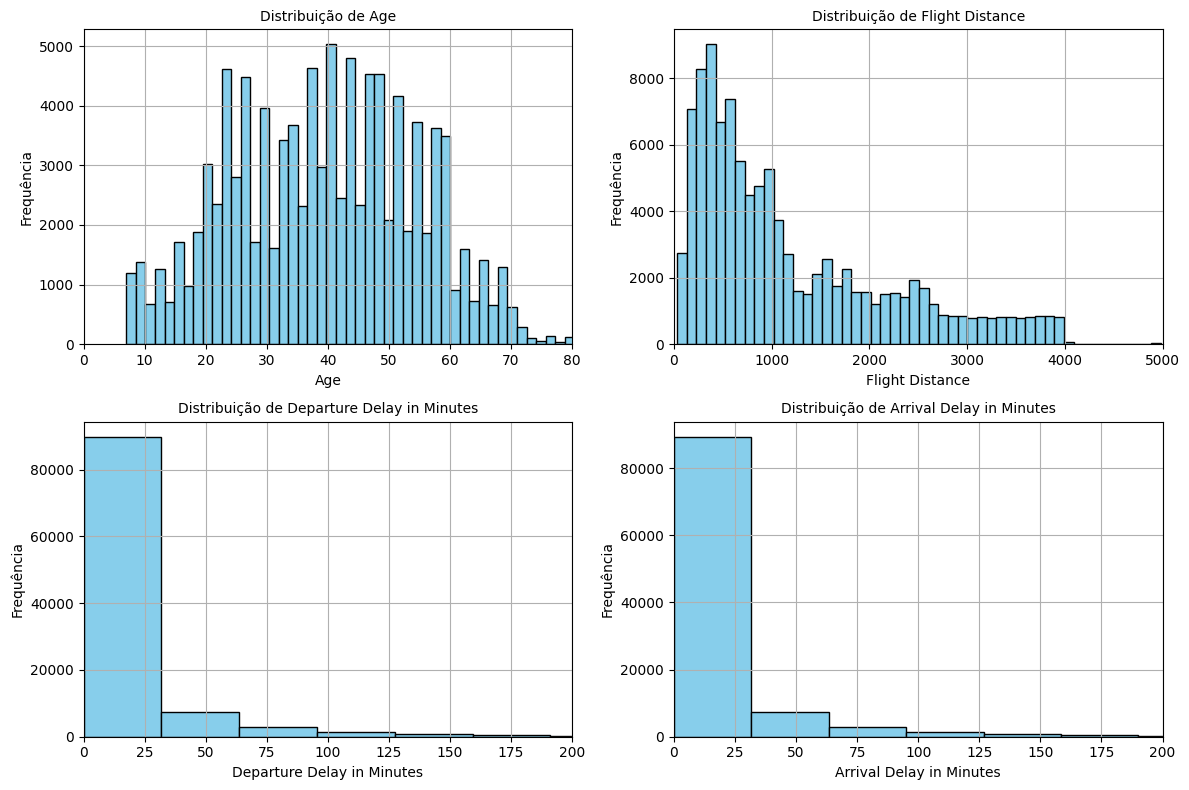

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), num_cols):
    df[col].hist(bins=50, ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(f"Distribuição de {col}", fontsize=10)
    ax.set_ylabel("Frequência")
    ax.set_xlabel(col)

    # Ajustes para focar na parte principal da distribuição
    if col == "Age":
        ax.set_xlim(0, 80)  # quase todos os passageiros estão até 80 anos
    elif col == "Flight Distance":
        ax.set_xlim(0, 5000)  # maioria dos voos é < 5000 km
    elif col == "Departure Delay in Minutes":
        ax.set_xlim(0, 200)  # corta atrasos extremos
    elif col == "Arrival Delay in Minutes":
        ax.set_xlim(0, 200)  # idem

plt.tight_layout()
plt.show()

**Visão geral das principais métricas - variáveis categóricas**

In [13]:
cols_valcat = ["Gender", "Customer Type", "Type of Travel", "satisfaction"]

# Estatísticas básicas (count, unique, top, freq)
print(df[cols_valcat].describe().T)

# Proporções (%)
for col in cols_valcat:
    print(f"\n{col}")
    print(df[col].value_counts(normalize=True).round(3) * 100)

                 count unique                      top   freq
Gender          103904      2                   Female  52727
Customer Type   103904      2           Loyal Customer  84923
Type of Travel  103904      2          Business travel  71655
satisfaction    103904      2  neutral or dissatisfied  58879

Gender
Gender
Female    50.7
Male      49.3
Name: proportion, dtype: float64

Customer Type
Customer Type
Loyal Customer       81.7
disloyal Customer    18.3
Name: proportion, dtype: float64

Type of Travel
Type of Travel
Business travel    69.0
Personal Travel    31.0
Name: proportion, dtype: float64

satisfaction
satisfaction
neutral or dissatisfied    56.7
satisfied                  43.3
Name: proportion, dtype: float64


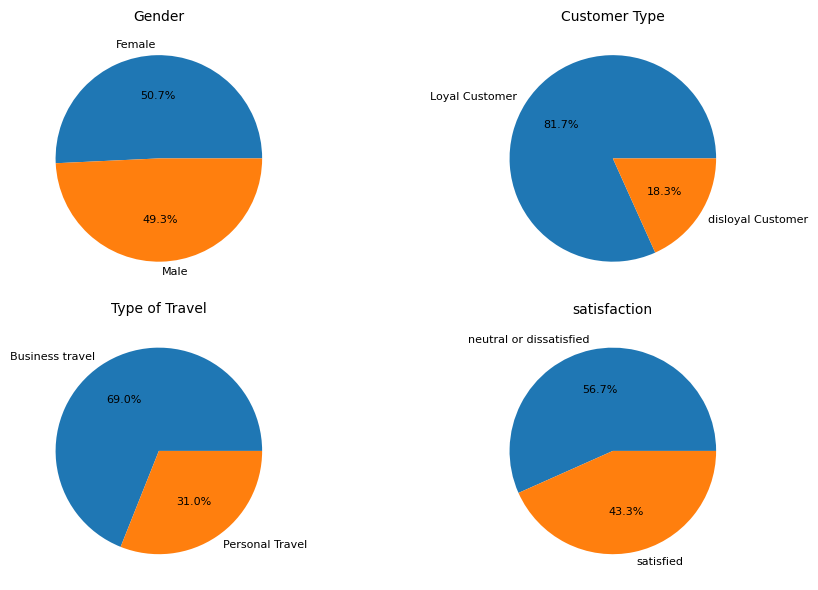

In [14]:
# Cria subplots lado a lado (2 linhas x 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for ax, col in zip(axes.flatten(), cols_valcat):
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        ax=ax,
        textprops={'fontsize': 8}  # textos menores
    )
    ax.set_ylabel("")
    ax.set_title(col, fontsize=10)

plt.tight_layout()
plt.show()

**Análise Exploratória Visual (EDA) - Bivariada**

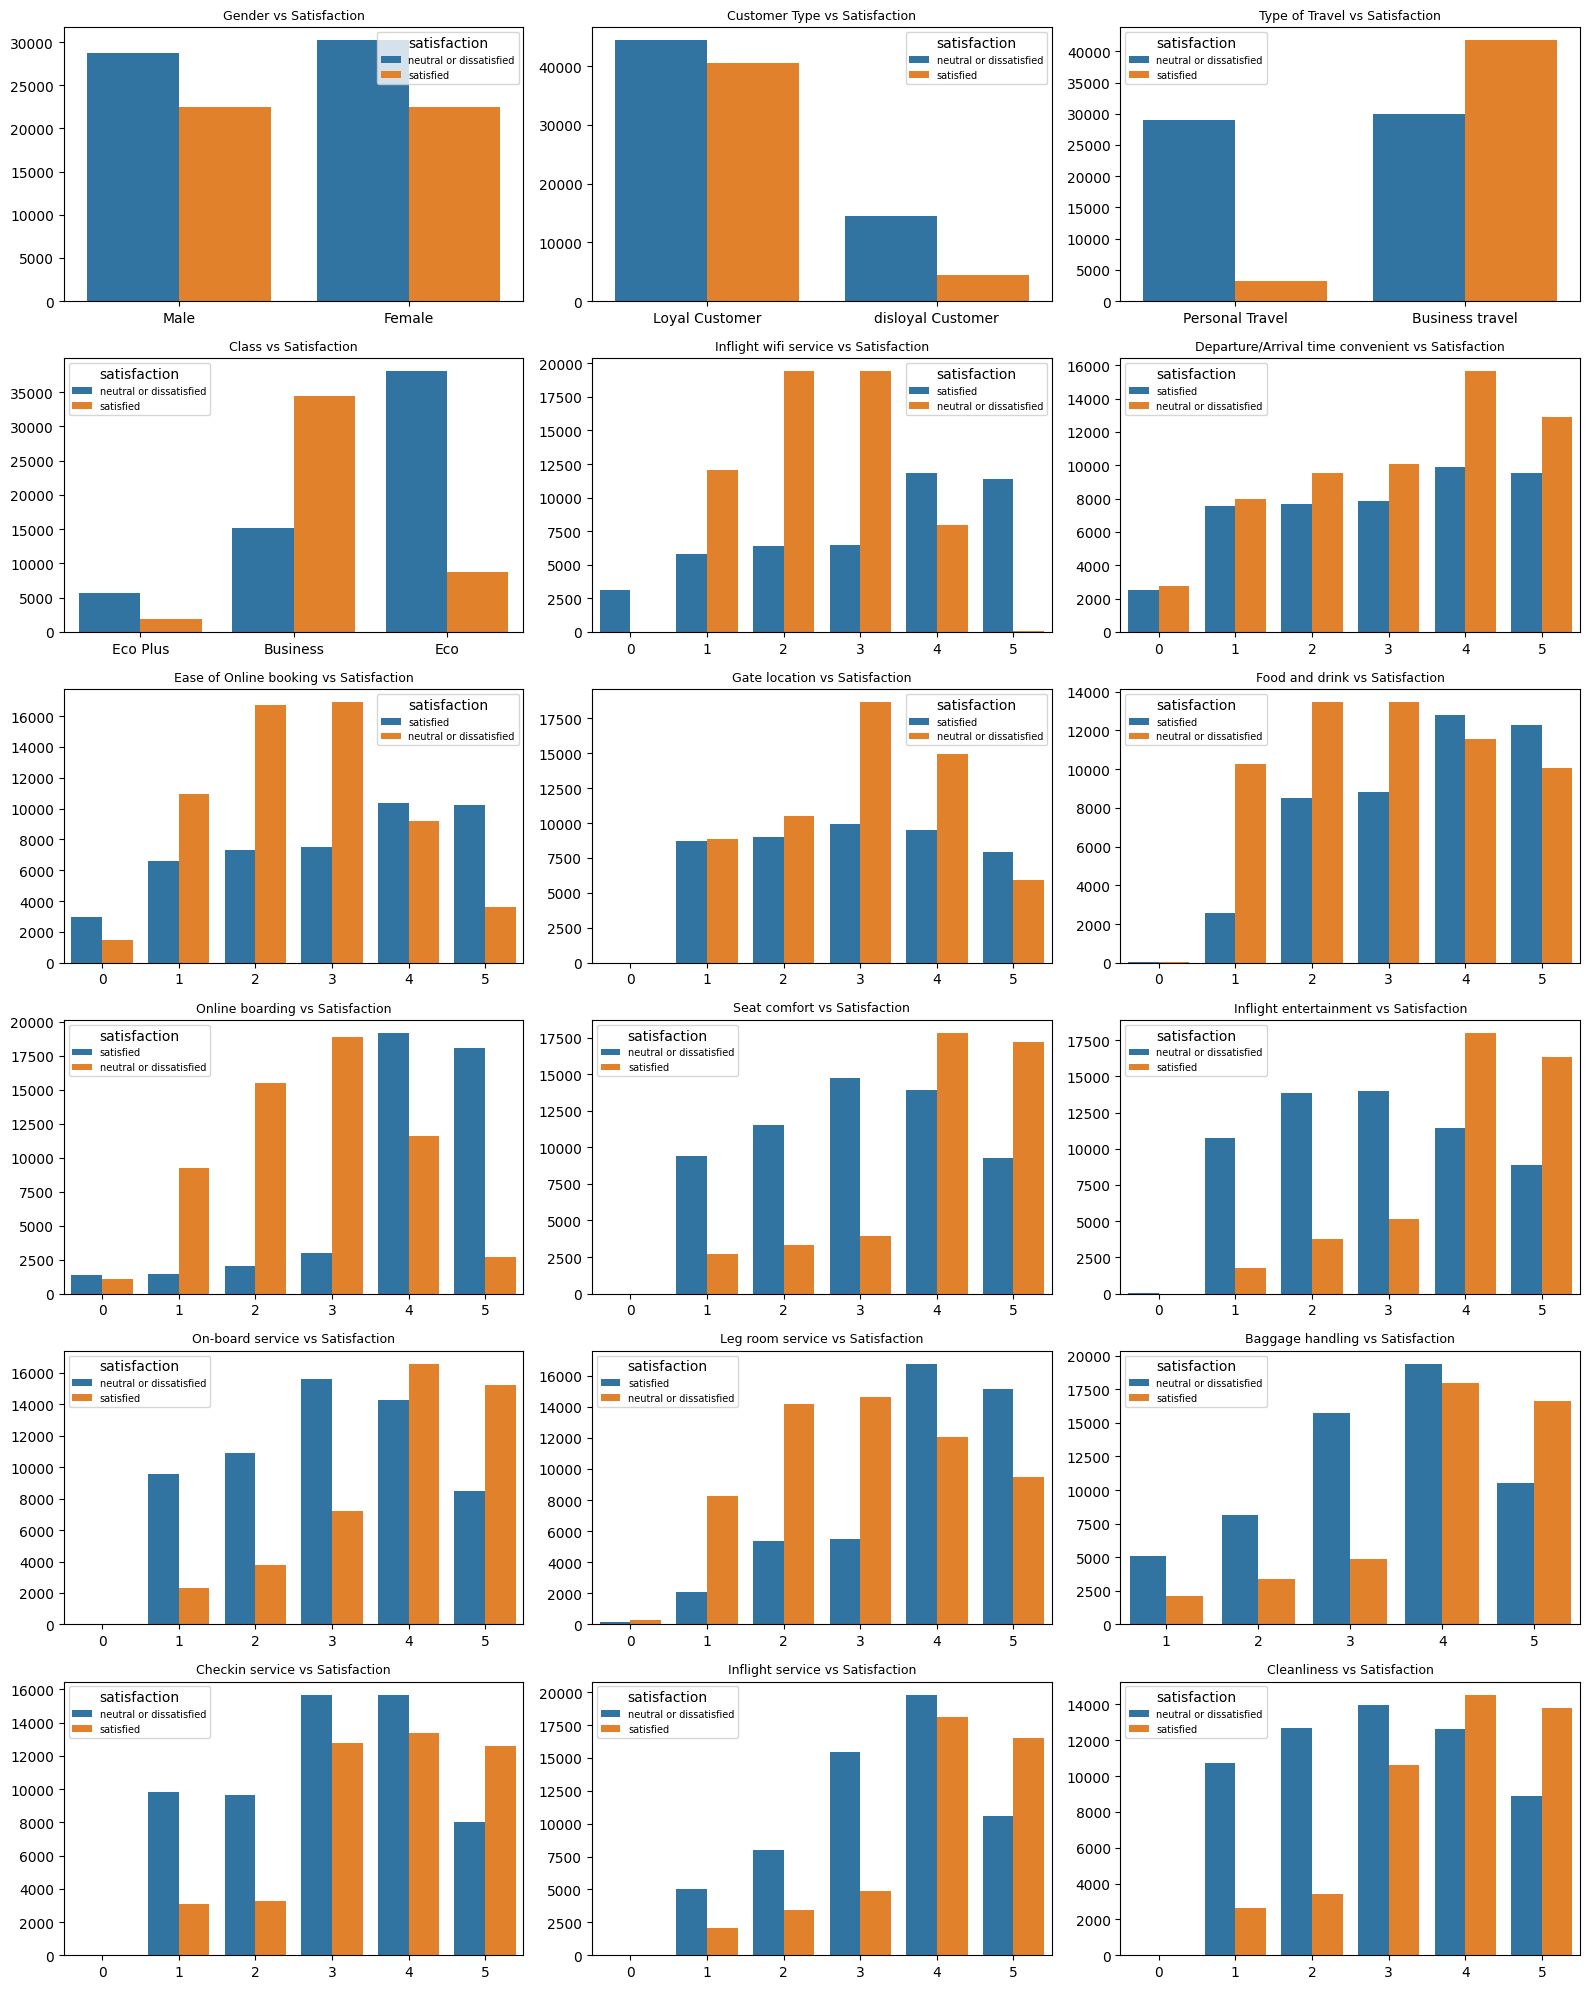

In [15]:
# Lista de variáveis categóricas (sem incluir 'satisfaction')

# Criar subplots (3 linhas x 6 colunas = 18 gráficos)
fig, axes = plt.subplots(6, 3, figsize=(16, 20))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, hue="satisfaction", ax=ax)
    ax.set_title(f"{col} vs Satisfaction", fontsize=9)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend(fontsize=7, title="satisfaction")

plt.tight_layout()
plt.show()

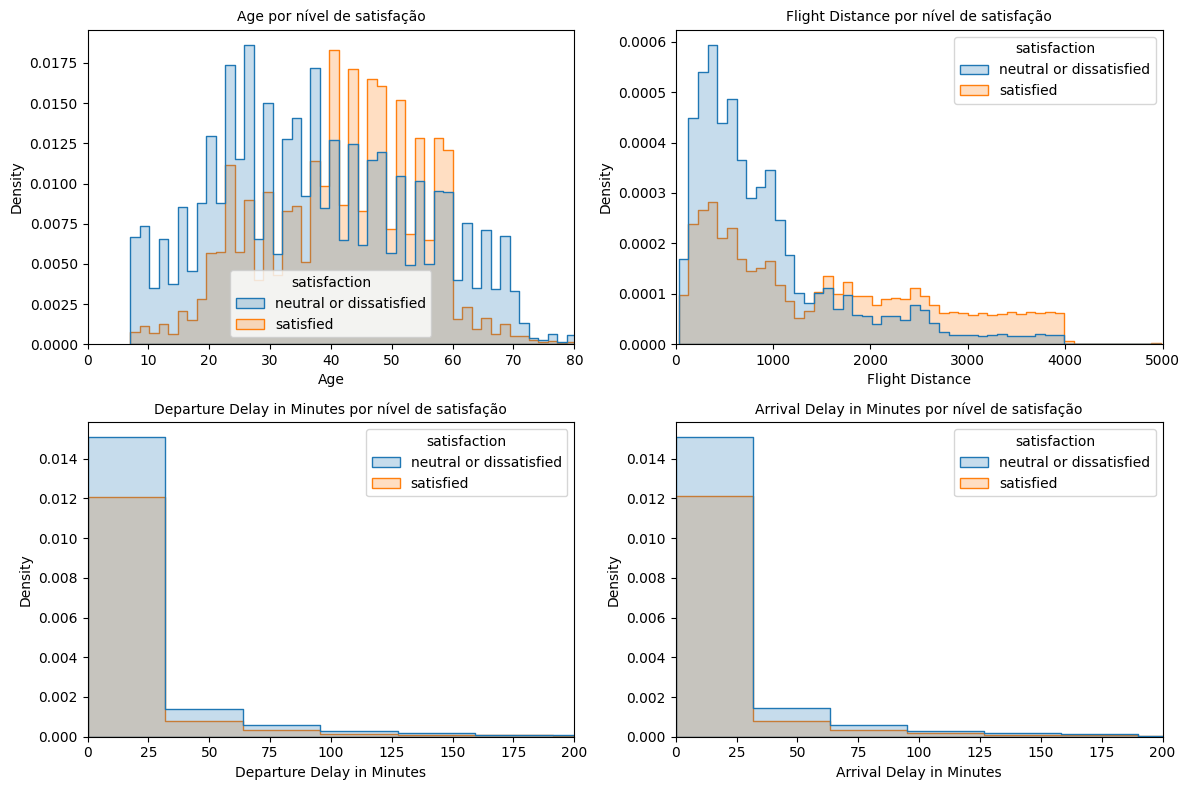

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(
        data=df, x=col, hue="satisfaction",
        bins=50, kde=False, ax=ax, element="step", stat="density"
    )
    ax.set_title(f"{col} por nível de satisfação", fontsize=10)

    # Ajustes para focar na região principal
    if col == "Age":
        ax.set_xlim(0, 80)
    elif col == "Flight Distance":
        ax.set_xlim(0, 5000)
    elif col in ["Departure Delay in Minutes", "Arrival Delay in Minutes"]:
        ax.set_xlim(0, 200)

plt.tight_layout()
plt.show()

In [17]:
# Configurações para melhorar a visualização dos gráficos
sns.set_style('whitegrid')

In [18]:
# Categóricas numéricas (escalas de 0 a 5, mas com tipo int)
feat_heatmap = [
    "Age","Inflight wifi service", "Departure/Arrival time convenient",
    "Ease of Online booking", "Gate location", "Food and drink",
    "Online boarding", "Seat comfort", "Inflight entertainment",
    "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness","Flight Distance",
    "Departure Delay in Minutes", "Arrival Delay in Minutes"
]

df_hm = df[feat_heatmap].copy()

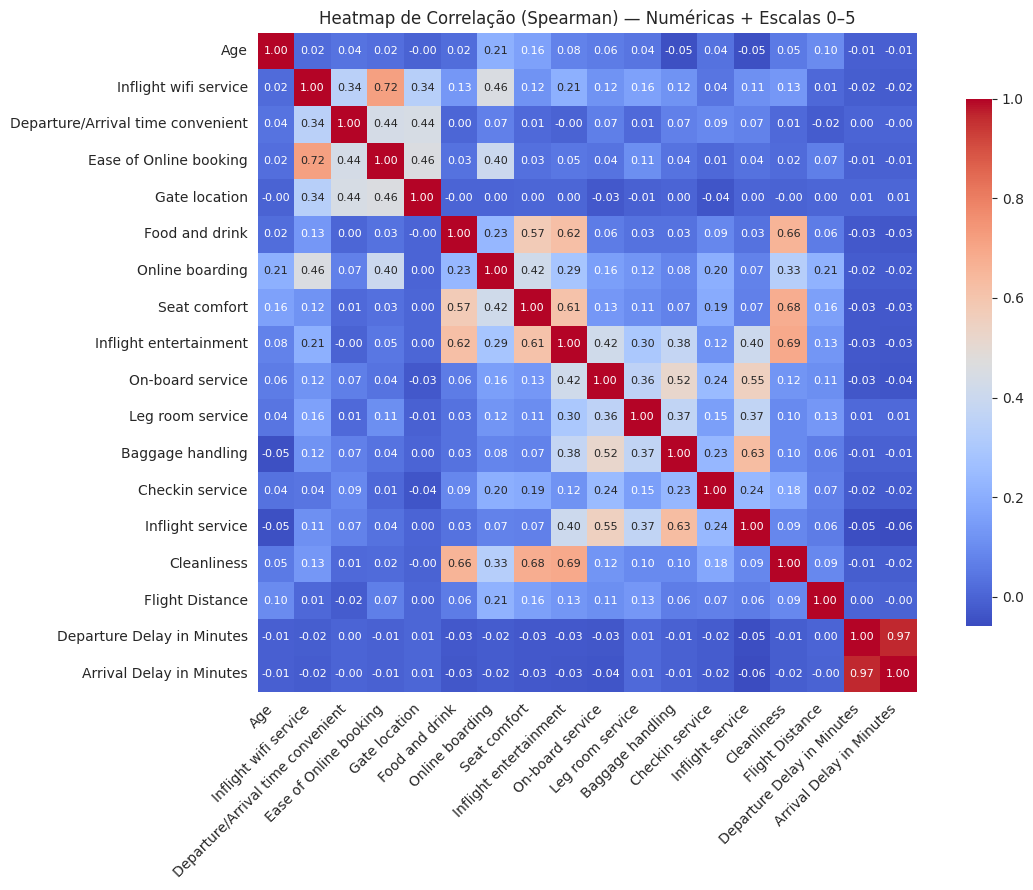

In [19]:
corr = df_hm.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(
    corr,
    annot=True,        # mostra os valores
    fmt=".2f",         # duas casas decimais
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}  # tamanho da fonte dos números
)
plt.title("Heatmap de Correlação (Spearman) — Numéricas + Escalas 0–5")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

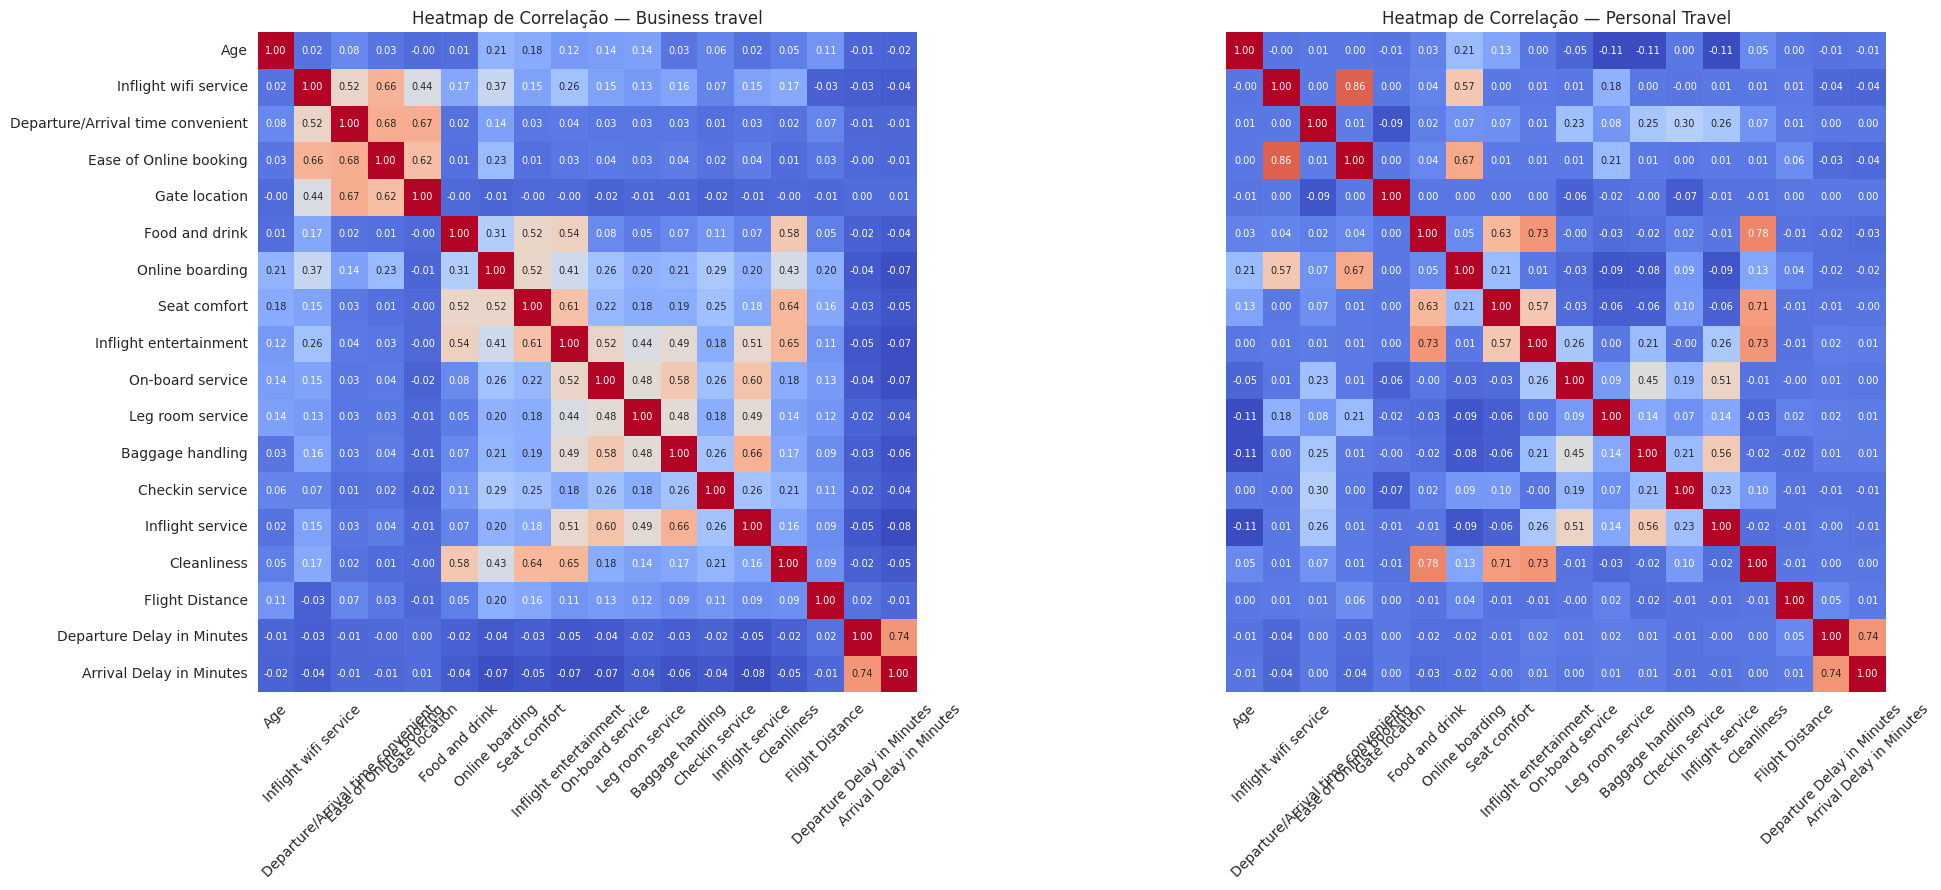

In [20]:
# Cria os subsets
travel_types = ["Business travel", "Personal Travel"]

fig, axes = plt.subplots(1, 2, figsize=(22, 9), sharex=True, sharey=True)

for ax, ttype in zip(axes, travel_types):
    sub = df[df["Type of Travel"] == ttype][feat_heatmap].apply(pd.to_numeric, errors="coerce")
    corr = sub.corr(method="spearman")

    sns.heatmap(
        corr, ax=ax,
        annot=True, fmt=".2f", cmap="coolwarm", square=True,
        annot_kws={"size": 7}, cbar=False
    )
    ax.set_title(f"Heatmap de Correlação — {ttype}", fontsize=12)
    ax.tick_params(axis="x", rotation=45)
    ax.tick_params(axis="y", rotation=0)

plt.tight_layout()
plt.show()

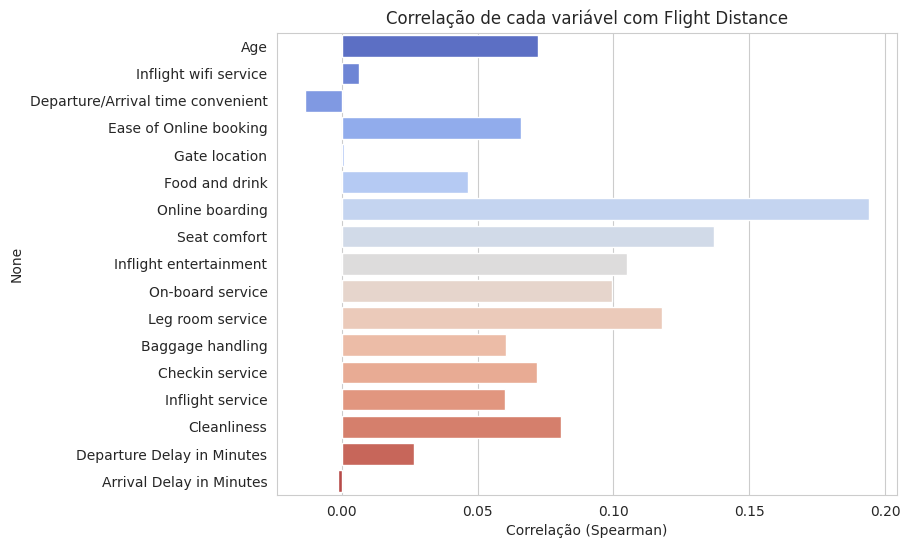

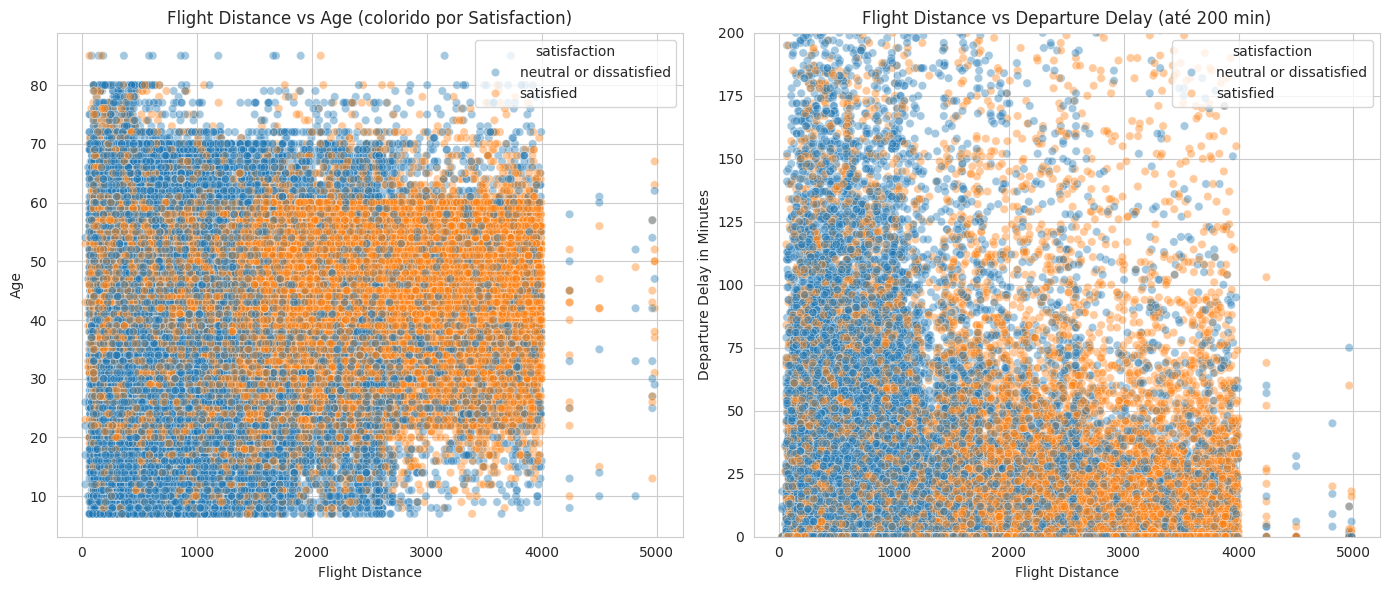

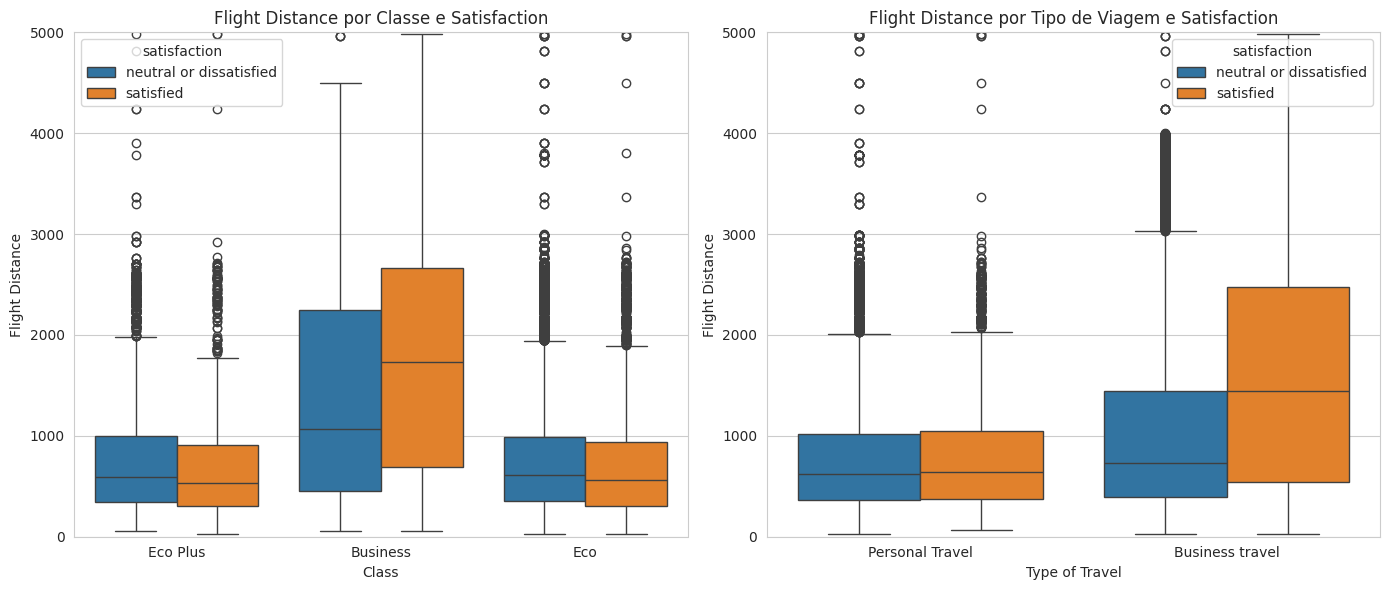

In [ ]:
# --- 1) Correlação com outras variáveis numéricas/categóricas numéricas ---
corr_fd = df_hm[feat_heatmap].corr(method="spearman")["Flight Distance"].drop("Flight Distance")

plt.figure(figsize=(8, 6))
sns.barplot(x=corr_fd.values, y=corr_fd.index, palette="coolwarm")
plt.title("Correlação de cada variável com Flight Distance")
plt.xlabel("Correlação (Spearman)")
plt.show()

# --- 2) Scatterplots: Flight Distance vs outras numéricas ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df, x="Flight Distance", y="Age", hue="satisfaction", alpha=0.4, ax=axes[0])
axes[0].set_title("Flight Distance vs Age (colorido por Satisfaction)")

sns.scatterplot(data=df, x="Flight Distance", y="Departure Delay in Minutes", hue="satisfaction", alpha=0.4, ax=axes[1])
axes[1].set_ylim(0, 200)  # corta outliers para melhor visualização
axes[1].set_title("Flight Distance vs Departure Delay (até 200 min)")

plt.tight_layout()
plt.show()

# --- 3) Boxplots: Flight Distance por variáveis categóricas ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x="Class", y="Flight Distance", hue="satisfaction", ax=axes[0])
axes[0].set_title("Flight Distance por Classe e Satisfaction")
axes[0].set_ylim(0, 5000)

sns.boxplot(data=df, x="Type of Travel", y="Flight Distance", hue="satisfaction", ax=axes[1])
axes[1].set_title("Flight Distance por Tipo de Viagem e Satisfaction")
axes[1].set_ylim(0, 5000)

plt.tight_layout()
plt.show()

## **PRÉ-PROCESSAMENTO**
* Correção dos nomes das colunas
* Os dados ausentes foram substituídos pelos valores medianos
* Fizemos a separação das features e o target

In [22]:
#Nomes da colunas
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [23]:
# Lógica de limpeza aprimorada para tratar o caso especial da coluna 'Class'
colunas_limpas = {}
for col in df.columns:
    if col == 'Class':
        colunas_limpas[col] = 'class_'
    else:
        colunas_limpas[col] = col.replace(' ', '_').replace('/', '_').replace('-', '_').lower()

df.rename(columns=colunas_limpas, inplace=True)

print("\n--- Nomes das colunas padronizados ---")
print(df.columns)


--- Nomes das colunas padronizados ---
Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class_',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')


In [24]:
#Como a coluna arrival_deley possui valores nulos vamos usar malores da mediana para preencher os dados
median_arrival_delay = df['arrival_delay_in_minutes'].median()
df['arrival_delay_in_minutes'].fillna(median_arrival_delay, inplace=True)

In [25]:
df.isnull().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class_                               0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

## **Vamos dividir o DataFrame em FEATURES (X) e TARGET(y)**

In [26]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [27]:
X.head(2)

gender      customer_type  age   type_of_travel    class_  flight_distance  \
0   Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1   Male  disloyal Customer   25  Business travel  Business              235   

   inflight_wifi_service  departure_arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   

   ease_of_online_booking  gate_location  ...  seat_comfort  \
0                       3              1  ...             5   
1                       3              3  ...             1   

   inflight_entertainment  on_board_service  leg_room_service  \
0                       5                 4                 3   
1                       1                 1                 5   

   baggage_handling  checkin_service  inflight_service  cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   

   departure_delay_in_minutes  arrival_delay_in_minutes  
0                          25                      18.0  
1                           1                       6.0  

[2 rows x 22 columns]

In [28]:
y.head(2)

0    neutral or dissatisfied
1    neutral or dissatisfied
Name: satisfaction, dtype: object

## **PRÉ-PROCESSAMENTO**
* StandardScaler - as features numéricas contínuas como Age, Flight Distance, DEoartue Delay in Minutes e Arrival DElay in Minutes Vamos escalonar
* OneHot Encoder - as features categóricas deverão ser transformadas em numéricas
* Como vamos realizar transformações me colunas numéricas e categóricas. O ColumnTransformer irá gerenciar este pré-processamento.

In [29]:
print(f'Colunas numéricas: {num_cols}')
print(f'Colunas categóricas: {cat_cols}')

Colunas numéricas: ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Colunas categóricas: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']


In [30]:
#Separar as colunas categóricas tipo: Object e as numéricas Tipo: int64 e float64 somente da X
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [31]:
print(f'Colunas numéricas: {numerical_features}')
print(f'Colunas categóricas: {categorical_features}')

Colunas numéricas: Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')
Colunas categóricas: Index(['gender', 'customer_type', 'type_of_travel', 'class_'], dtype='object')


In [32]:
#Somente as variáveis Age, Flight Distance, DEparture Delay in Minutes e Arrival Delay in Minutes serão escalonadas
numerical_transformer = StandardScaler()
#Cada categoria vira uma nova coluna binária (dummy variable)
#handle_unknow='ignore' garante que novas categoria que possam vir a aparecer após o treino recebem 0 para não dar erro
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [33]:
#Agora vamos aplicar as transformações criando uma instância
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),      #aplicando transformações armazenadas em numerical_transformer nas features numéricas
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'         # Mantém colunas não especificadas (se houver)

)

In [34]:
#O correto agora é realizarmos o split.
#Divisão de 80% treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#Agora vamos aplicar o fit. que irá aprender sobre as transformações no conjunto de treino.
# Treino → usa fit_transform (aprende + aplica).
# Teste → usa só transform (aplica o que já foi aprendido no treino).
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [36]:
print("\n--- Divisão dos Dados ---")
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print("\n--- Dados Processados ---")
print(f"Formato de X_train_processed: {X_train_processed.shape}")
print(f"Formato de X_test_processed: {X_test_processed.shape}")


--- Divisão dos Dados ---
Formato de X_train: (83123, 22)
Formato de X_test: (20781, 22)

--- Dados Processados ---
Formato de X_train_processed: (83123, 27)
Formato de X_test_processed: (20781, 27)


##**TREINAR O MODELO**

In [37]:
#Vamos usar o pipeline para encapsular todas estas transformações em uma variével e já transferir para o modelo

#Primeiro instanciamos o modelo passando alguns parâmetros
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

#Agora executamos o pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

#Treinando o modelo
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'customer_type', 'type_of_travel', 'class_'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [38]:
#Agora com o modelo treinado podemos fazer as previsões com o conjunto que esta separado (X_test)
print("--- Realizando previsões no conjunto de teste... ---")
y_pred = full_pipeline.predict(X_test)
print(f'Predições: {y_pred}')

--- Realizando previsões no conjunto de teste... ---
Predições: ['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' ... 'neutral or dissatisfied' 'satisfied'
 'satisfied']


##**AVALIANDO A PERFORMANCE DO MODELO**

In [39]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9628025600307973
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     11713
              satisfied       0.97      0.94      0.96      9068

               accuracy                           0.96     20781
              macro avg       0.96      0.96      0.96     20781
           weighted avg       0.96      0.96      0.96     20781




--- Visualizando a Matriz de Confusão ---


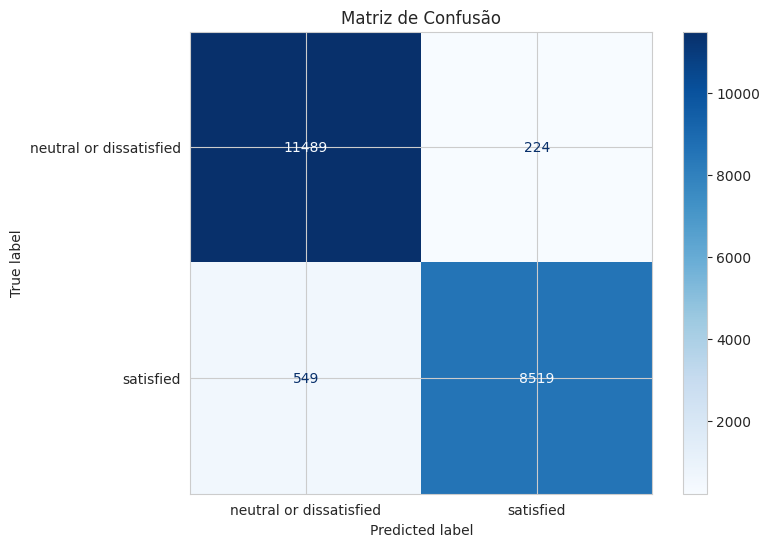


Exemplo de probabilidades para as 5 primeiras instâncias:
Passageiro 0: Prob(Neutral/Insatisfeito)=1.00, Prob(Satisfeito)=0.00, Predição final = neutral or dissatisfied
Passageiro 1: Prob(Neutral/Insatisfeito)=0.99, Prob(Satisfeito)=0.01, Predição final = neutral or dissatisfied
Passageiro 2: Prob(Neutral/Insatisfeito)=1.00, Prob(Satisfeito)=0.00, Predição final = neutral or dissatisfied
Passageiro 3: Prob(Neutral/Insatisfeito)=0.99, Prob(Satisfeito)=0.01, Predição final = neutral or dissatisfied
Passageiro 4: Prob(Neutral/Insatisfeito)=0.85, Prob(Satisfeito)=0.15, Predição final = neutral or dissatisfied


In [40]:
print("\n--- Visualizando a Matriz de Confusão ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

y_proba = full_pipeline.predict_proba(X_test)

print("\nExemplo de probabilidades para as 5 primeiras instâncias:")
for i in range(5):
    print(f"Passageiro {i}: "
          f"Prob(Neutral/Insatisfeito)={y_proba[i][0]:.2f}, "
          f"Prob(Satisfeito)={y_proba[i][1]:.2f}, "
          f"Predição final = {y_pred[i]}")

* VP  - 8519: O modelo previu como satisfeitos e ele aceitou
* VN - 11489: O modelo previu como insatisfeito e ele acertou
* FP - 224: O modelo prevido como satisfeito, mas o passageiro avaliou como insatisfeito
* FN - 549: O modelo previu como insatisfeito, mas o passegiro avaliou como satisfeito.

#** Validação Final com Dados de Teste Dedicados**

--- Carregando o arquivo de teste final: test.csv ---

--- Realizando previsões no conjunto de teste final ---

--- Relatório de Classificação Final (test.csv) ---
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14573
              satisfied       0.97      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976


--- Visualizando a Matriz de Confusão Final (test.csv) ---


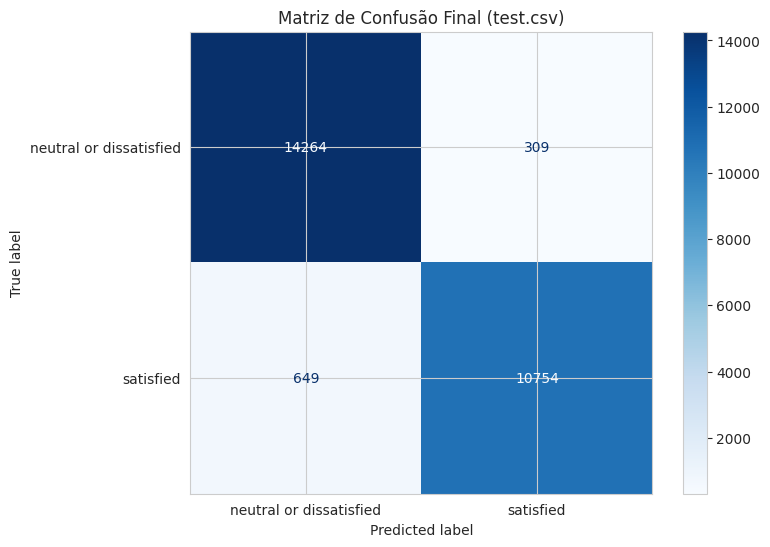


Exemplo de probabilidades para as 5 primeiras instâncias:
Passageiro 0: Prob(Neutral/Insatisfeito)=0.01, Prob(Satisfeito)=0.99, Predição final = neutral or dissatisfied
Passageiro 1: Prob(Neutral/Insatisfeito)=0.01, Prob(Satisfeito)=0.99, Predição final = neutral or dissatisfied
Passageiro 2: Prob(Neutral/Insatisfeito)=1.00, Prob(Satisfeito)=0.00, Predição final = neutral or dissatisfied
Passageiro 3: Prob(Neutral/Insatisfeito)=0.04, Prob(Satisfeito)=0.96, Predição final = neutral or dissatisfied
Passageiro 4: Prob(Neutral/Insatisfeito)=0.78, Prob(Satisfeito)=0.22, Predição final = neutral or dissatisfied


In [41]:
# Carregar o novo arquivo de teste
print("--- Carregando o arquivo de teste final: test.csv ---")
df_final_test = pd.read_csv('/content/test.csv')

# --- Aplicar o mesmo pré-processamento ---
df_final_test.rename(columns=colunas_limpas, inplace=True)

df_final_test.loc[:, 'arrival_delay_in_minutes'] = df_final_test['arrival_delay_in_minutes'].fillna(median_arrival_delay)

# Separar as features (X) e o alvo (y)
X_final_test = df_final_test.drop('satisfaction', axis=1)
y_final_test = df_final_test['satisfaction']

# Usar o NOSSO PIPELINE JÁ TREINADO para prever no novo conjunto de teste.
print("\n--- Realizando previsões no conjunto de teste final ---")
y_final_pred = full_pipeline.predict(X_final_test)

# Gerar o Relatório de Classificação final
print("\n--- Relatório de Classificação Final (test.csv) ---")
print(classification_report(y_final_test, y_final_pred))

# Gerar a Matriz de Confusão final
print("\n--- Visualizando a Matriz de Confusão Final (test.csv) ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_final_test, y_final_pred, ax=ax, cmap='Blues')
plt.title('Matriz de Confusão Final (test.csv)')
plt.show()

y_proba = full_pipeline.predict_proba(X_final_test)

print("\nExemplo de probabilidades para as 5 primeiras instâncias:")
for i in range(5):
    print(f"Passageiro {i}: "
          f"Prob(Neutral/Insatisfeito)={y_proba[i][0]:.2f}, "
          f"Prob(Satisfeito)={y_proba[i][1]:.2f}, "
          f"Predição final = {y_pred[i]}")

### 15. Análise e Interpretabilidade do Modelo (XAI - Explainable AI)

Um modelo com alta acurácia é um ótimo resultado, mas no mundo real, muitas vezes precisamos ir além e entender o **"porquê"** por trás de suas previsões. Prever se um passageiro ficará satisfeito é útil, mas entender *quais fatores* levam a essa satisfação gera insights de negócio que podem guiar ações estratégicas.

Nesta seção, vamos "abrir a caixa-preta" do nosso `RandomForestClassifier` para extrair esse conhecimento. Utilizaremos um conjunto de técnicas de Explicabilidade em IA (XAI) para responder a três perguntas fundamentais em uma ordem lógica, indo do geral para o específico:

1.  **Quais são as variáveis mais importantes para o modelo?** (Visão Macro)
2.  **Como essas variáveis impactam as previsões?** (Visão de Impacto)
3.  **Por que uma previsão específica foi feita para um passageiro?** (Visão Local)

### Visão Geral: Quais Variáveis São Mais Importantes?

Para começar, vamos obter uma visão geral da importância de cada variável. Faremos isso de duas maneiras complementares para garantir uma análise robusta.

  * **MDI (Mean Decrease in Impurity):** Uma medida rápida, baseada em quão bem uma variável consegue "purificar" os nós das árvores de decisão durante o treinamento.
  * **Permutation Importance:** Uma técnica mais confiável e realista. Ela mede a queda na performance do modelo (no conjunto de teste) quando os valores de uma variável são aleatoriamente embaralhados. Uma queda grande significa que o modelo depende muito daquela variável.

#### O que Este Código Faz?

1.  **Extração do Modelo e Nomes das Features:**

      * Primeiro, extraímos o modelo `RandomForestClassifier` já treinado de dentro do nosso `full_pipeline`.
      * Em seguida, recuperamos os nomes de todas as features após a etapa de pré-processamento. Isso é crucial porque o `OneHotEncoder` cria novas colunas, e precisamos saber a que cada uma se refere.

2.  **Cálculo da Importância MDI (Gini):**

      * Acessamos o atributo `modelo_rf_final.feature_importances_` para obter a importância MDI de cada coluna processada.
      * **Ponto-chave:** Como o `OneHotEncoder` divide uma variável categórica (ex: `Type of Travel`) em várias colunas (`Type of Travel_Personal Travel`, `Type of Travel_Business`), o código utiliza a função `collapse_dummy` e um `groupby` para somar a importância dessas colunas de volta à sua variável original. Isso nos dá uma visão muito mais clara e acionável.

3.  **Cálculo da Permutation Importance:**

      * Utilizamos a função `permutation_importance` do Scikit-learn, que é a abordagem mais recomendada.
      * Passamos o `full_pipeline` inteiro para a função, junto com os dados de teste **brutos** (`X_test`, `y_test`). Isso garante que a permutação seja avaliada de forma justa, considerando todo o fluxo de pré-processing.
      * O código vai além e calcula a importância usando **múltiplas métricas** (`balanced_accuracy`, `roc_auc`, etc.), pois a relevância de uma feature pode depender do que consideramos um "sucesso" para o negócio.


--- Análise 1: Importância de Variáveis (Feature Importance) ---
 
As Top 5 variévais mais usadas no treinamento:                       orig  importance
19         online_boarding    0.148661
16   inflight_wifi_service    0.135451
4                    class    0.119993
21          type_of_travel    0.113702
14  inflight_entertainment    0.062874
 
[1.2] Plotando as 10 variáveis mais importantes (MDI Agregado).
 


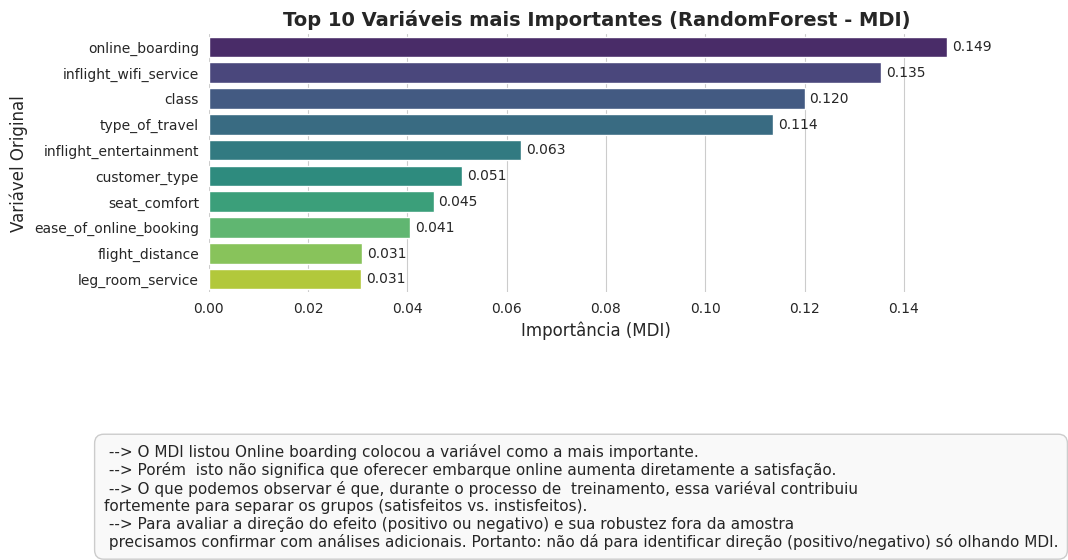

In [ ]:
# --- MDI (Gini) Importance ---

# Extrair o modelo RandomForest treinado do pipeline otimizado
modelo_rf_final = full_pipeline.named_steps['classifier']

# Extrair os nomes das features do pré-processador
num_features = list(numerical_features)
cat_features = list(full_pipeline.named_steps['preprocessor']
                   .named_transformers_['cat']
                   .get_feature_names_out(categorical_features))

# Combinar todos os nomes de features
all_features = num_features + cat_features

# Calcula a importância MDI
mdi = pd.DataFrame({
    "feature": all_features,
    "importance": modelo_rf_final.feature_importances_
}).sort_values("importance", ascending=False)

# Função para agregar a importância de features criadas pelo OneHotEncoder
def collapse_dummy(name: str,
                   ohe_prefixes=("class","type_of_travel","customer_type","gender")) -> str:
    for p in ohe_prefixes:
        if name.startswith(p + "__") or name.startswith(p + "_"):
            return p
    return name

# Agrega a importância por variável original
mdi["orig"] = mdi["feature"].map(collapse_dummy)
mdi_agg = (mdi.groupby("orig", as_index=False)["importance"]
           .sum()
           .sort_values("importance", ascending=False))

print("--- Análise 1: Importância de Variáveis (Feature Importance) ---")
print(" ")
print(f'As Top 5 variévais mais usadas no treinamento: {mdi_agg.head(5)}')
print(" ")
print("[1.2] Plotando as 10 variáveis mais importantes (MDI Agregado).")
print(" ")
# Plota o Top 10 de importância MDI
topN = 10
fig, ax = plt.subplots(figsize=(10, 6))

# Paleta de cores progressiva
palette = sns.color_palette("viridis", n_colors=topN)

sns.barplot(
    data=mdi_agg.head(topN),
    x="importance",
    y="orig",
    palette=palette,
    ax=ax
)

# Rótulos e título
ax.set_xlabel("Importância (MDI)", fontsize=12)
ax.set_ylabel("Variável Original", fontsize=12)
ax.set_title(f"Top {topN} Variáveis mais Importantes (RandomForest - MDI)",
             fontsize=14, weight="bold")

# Mostra valores nas barras
for i, (imp, feat) in enumerate(zip(mdi_agg.head(topN)["importance"], mdi_agg.head(topN)["orig"])):
    ax.text(imp + 0.001, i, f"{imp:.3f}", va="center", fontsize=10)

# Texto do rodapé
notes = (
 " --> O MDI listou Online boarding colocou a variável como a mais importante. \n"
 " --> Porém  isto não significa que oferecer embarque online aumenta diretamente a satisfação. \n"
" --> O que podemos observar é que, durante o processo de  treinamento, essa variéval contribuiu \n"
"fortemente para separar os grupos (satisfeitos vs. instisfeitos). \n"
" --> Para avaliar a direção do efeito (positivo ou negativo) e sua robustez fora da amostra \n"
" precisamos confirmar com análises adicionais."
" Portanto: não dá para identificar direção (positivo/negativo) só olhando MDI."
)

# Ajuste de espaço e rodapé
plt.subplots_adjust(bottom=0.45)
fig.text(0.02, 0.02, notes, ha="left", va="bottom", fontsize=11,
         bbox=dict(boxstyle="round,pad=0.6", fc="#f9f9f9", ec="#cccccc"))

sns.despine(left=True, bottom=True)
plt.show()


[1.3] Calculando a Importância por Permutação (Permutation Importance)...
 
Isso pode levar alguns segundos, pois o modelo é reavaliado múltiplas vezes.
Avaliando com base em Acurácia (referência global - as classes estão balanceadas.

[1.4] Plotando as 10 variáveis mais importantes (Permutation Importance - Acurácia Balanceada).


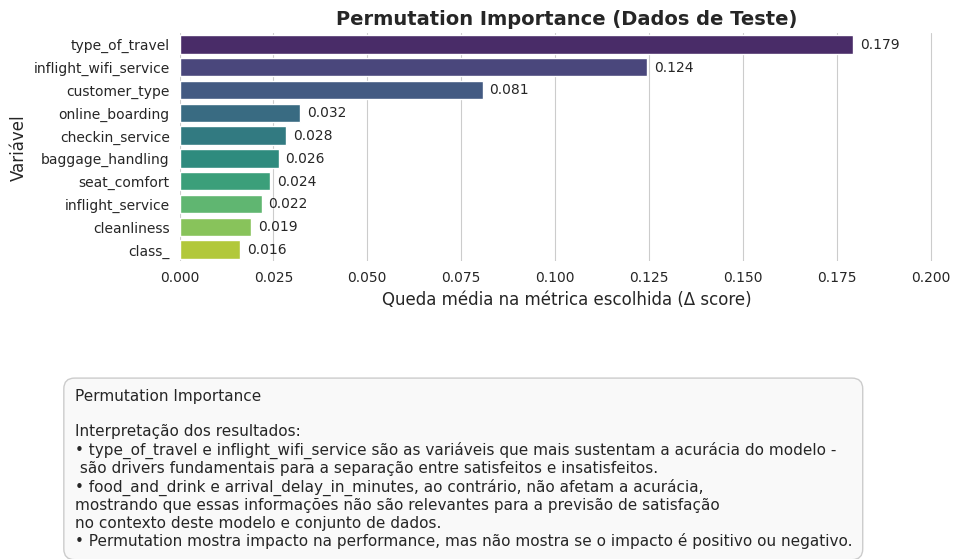

In [43]:
# --- Permutation Importance ---

print("\n[1.3] Calculando a Importância por Permutação (Permutation Importance)...")
print(" ")
print("Isso pode levar alguns segundos, pois o modelo é reavaliado múltiplas vezes.")
print("Avaliando com base em Acurácia (referência global - as classes estão balanceadas.")

# Roda a Permutation Importance com diferentes métricas de avaliação
r_acc = permutation_importance(full_pipeline, X_test, y_test, n_repeats=10, random_state=42, scoring="accuracy")
'''
# Balanced accuracy
r_bal = permutation_importance(full_pipeline, X_test, y_test, n_repeats=10, random_state=42, scoring="balanced_accuracy")
# ROC AUC (RandomForestClassifier tem predict_proba)
r_auc = permutation_importance(full_pipeline, X_test, y_test, n_repeats=10, random_state=42, scoring="roc_auc")
# 3) Recall da classe "satisfied" (alvo específico)
recall_pos = make_scorer(recall_score, pos_label="satisfied")
r_rec = permutation_importance(full_pipeline, X_test, y_test, n_repeats=10, random_state=42, scoring=recall_pos)
# 4) F2-score (pesa mais recall)
f2 = make_scorer(fbeta_score, beta=2, pos_label="satisfied")
r_f2 = permutation_importance(full_pipeline, X_test, y_test,
                              n_repeats=10, random_state=42,
                              scoring=f2)
'''
# Escolhe a métrica a ser visualizada
metrica_perm = r_acc

# Empacota o resultado para visualização
perm_teste = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": metrica_perm.importances_mean,
    "importance_std":  metrica_perm.importances_std
}).sort_values("importance_mean", ascending=False)

print("\n[1.4] Plotando as 10 variáveis mais importantes (Permutation Importance - Acurácia Balanceada).")
# Top 10 variáveis mais importantes pela permutation importance
top = perm_teste.head(10).sort_values("importance_mean", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Paleta progressiva
palette = sns.color_palette("viridis", n_colors=len(top))

sns.barplot(
    data=top,
    x="importance_mean",
    y="feature",
    palette=palette,
    errorbar=None,
    ax=ax
)

# Limite do eixo X com folga
ax.set_xlim(0, top["importance_mean"].max() * 1.15)

# Valores nas barras
for p, val in zip(ax.patches, top["importance_mean"].values):
    ax.text(
        p.get_width() + (0.01 * top["importance_mean"].max()),
        p.get_y() + p.get_height()/2,
        f"{val:.3f}",
        va="center",
        fontsize=10
    )

# Rótulos e título
ax.set_xlabel("Queda média na métrica escolhida (Δ score)", fontsize=12)
ax.set_ylabel("Variável", fontsize=12)
ax.set_title("Permutation Importance (Dados de Teste)", fontsize=14, weight="bold")

# --- Rodapé (notes que você pode preencher) ---
notes = (
 "Permutation Importance\n"
    "\n"
    "Interpretação dos resultados:\n"
    "• type_of_travel e inflight_wifi_service são as variáveis que mais sustentam a acurácia do modelo - \n "
    "são drivers fundamentais para a separação entre satisfeitos e insatisfeitos.\n"
    "• food_and_drink e arrival_delay_in_minutes, ao contrário, não afetam a acurácia, \n"
    "mostrando que essas informações não são relevantes para a previsão de satisfação \n"
    "no contexto deste modelo e conjunto de dados. \n"
    "• Permutation mostra impacto na performance, mas não mostra se o impacto é positivo ou negativo."
)

plt.subplots_adjust(bottom=0.50)  # espaço para o rodapé
fig.text(
    0.02, 0.02, notes,
    ha="left", va="bottom",
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.7", fc="#f9f9f9", ec="#cccccc")
)

sns.despine(left=True, bottom=True)
plt.show()


### Aprofundando o Impacto e as Interações com SHAP

Agora que sabemos *quais* variáveis são importantes, queremos entender *como* elas influenciam as previsões. Para isso, usaremos a biblioteca `shap`, uma ferramenta poderosa baseada na teoria dos jogos que explica a contribuição de cada feature para cada previsão individual.

#### O que Este Código Faz?

1.  **Preparação e Amostragem:**

      * Para que a análise seja computacionalmente viável, criamos uma amostra do nosso conjunto de teste para servir como "fundo" (`background data`).
      * Utilizamos `StratifiedShuffleSplit` para garantir que essa amostra mantenha a mesma proporção de passageiros satisfeitos e insatisfeitos do conjunto original, tornando a análise mais precisa.
      * Instanciamos o `shap.TreeExplainer`, otimizado para modelos baseados em árvores como o Random Forest.

2.  **Visão Global (`Summary Plot`):**

      * Calculamos os valores SHAP para a nossa amostra e geramos um `summary_plot`.
      * Este gráfico é extremamente rico: ele ordena as variáveis por importância, mas também mostra o **impacto** de cada uma. Pontos à direita do eixo zero representam um impacto positivo na previsão de "satisfação", e pontos à esquerda, um impacto negativo. A cor indica se o valor da feature era alto (vermelho) ou baixo (azul).

3.  **Análise de Dependência e Interação (`Dependence Plot`):**

      * Geramos um `dependence_plot` para uma variável específica. Ele mostra como a previsão do modelo muda à medida que o valor daquela variável muda.
      * Sua principal vantagem é a capacidade de sugerir **interações**: os pontos podem ser coloridos com base nos valores de uma segunda variável, revelando se a relação da primeira variável com o alvo depende de uma terceira.


--- Análise 2: Aprofundando o Impacto com SHAP ---
 

[2.1] Preparando dados para o SHAP: Criando uma amostra de fundo estratificada...
 
-> Amostra de fundo ('background data') criada com shape: (200, 27)
 
[2.2] Calculando os valores SHAP para a amostra de fundo...
Esta pode ser uma etapa demorada dependendo do tamanho da amostra.
 

[2.3] Gerando Gráfico de Resumo Global (SHAP Summary Plot)...
 


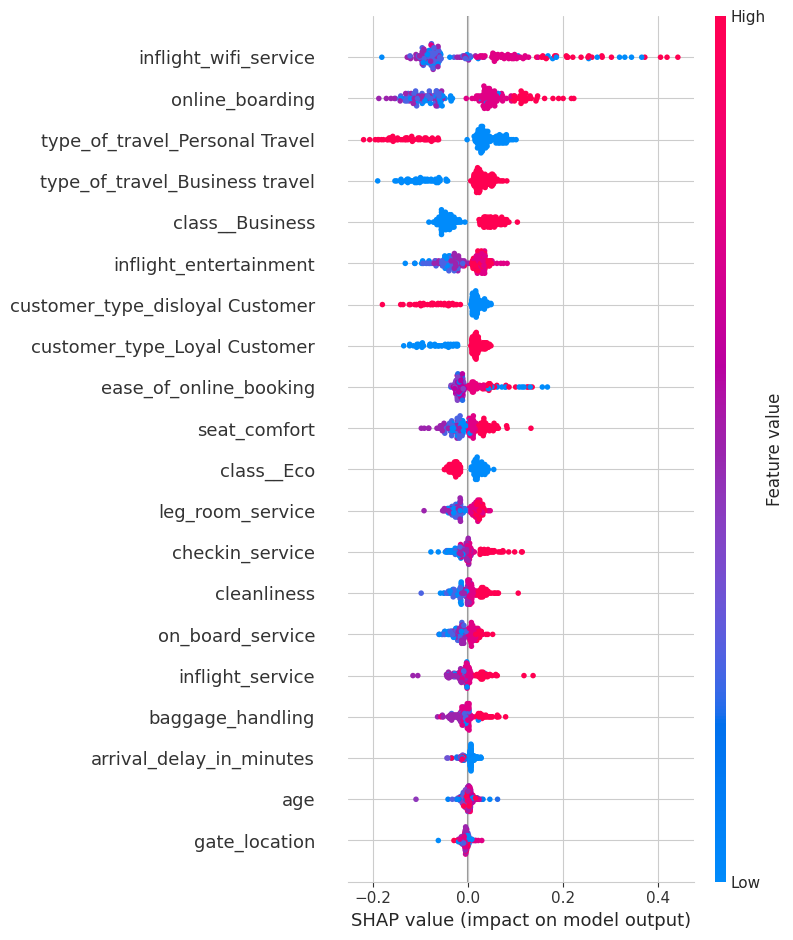


[2.4] Gerando Gráfico de Dependência para 'online_boarding' com interação por tipo de viagem...
 


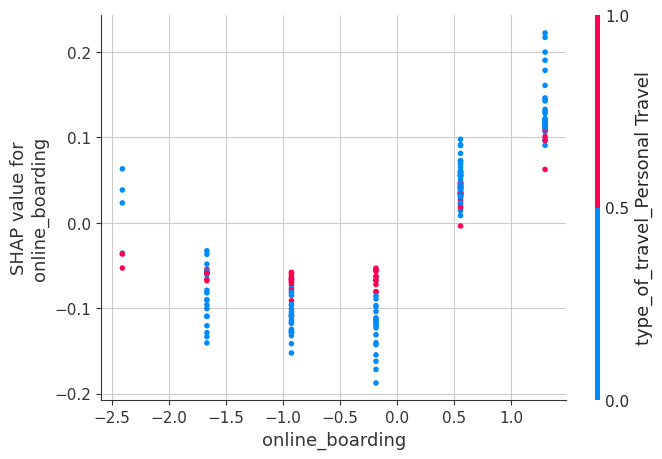

 Resumo - SHAP Summary e Dependence Plots
Summary Plot (Beeswarm) do SHAP:
   Variáveis no topo (inflight_wifi_service, online_boarding) → são aquelas que, em média, mais deslocam as previsões (aumentando ou diminuindo a probabilidade de satisfação).
   Variáveis no fim da lista (gate_location, age) → têm impacto pequeno ou quase nulo no resultado do modelo.
SHAP Dependence Plot - Análise da variável online_boarding, com interação em type_of_travel. 
   online_boarding: A relação é monotônica crescente: quanto maior a nota de embarque online, maior o valor SHAP ⇒ maior probabilidade de satisfação.
   Interação com Type of Travel: efeito positivo mais forte para Business travel do que para Personal travel.

Conclusão: 
No geral, o modelo depende fortemente de fatores ligados à experiência digital (wifi, embarque online),
sendo o inflight_wifi_service e online_boarding aparecem no topo → são os maiores direcionadores do modelo.
Analisando uma das variável de experiência digial associada 

In [44]:
print("\n--- Análise 2: Aprofundando o Impacto com SHAP ---")
print(" ")

# Transforma os dados de teste uma vez para usar com SHAP
print("\n[2.1] Preparando dados para o SHAP: Criando uma amostra de fundo estratificada...")
print(" ")
X_test_processed = full_pipeline.named_steps["preprocessor"].transform(X_test)
if hasattr(X_test_processed, "toarray"):
    X_test_tr_dense = X_test_processed.toarray()
else:
    X_test_tr_dense = X_test_processed

# Amostra extratificada para manter a proporção entre as classes
n = min(200, len(y_test)) # Usar no máximo 1000 amostras para o background
frac = n / len(y_test)
sss = StratifiedShuffleSplit(n_splits=1, test_size=frac, random_state=42)
_, idx = next(sss.split(X_test_tr_dense, y_test))
X_bg = X_test_tr_dense[idx]
y_bg = y_test.iloc[idx]

print(f"-> Amostra de fundo ('background data') criada com shape: {X_bg.shape}")
print(" ")
# Instancia o TreeExplainer com o modelo final
expl = shap.TreeExplainer(modelo_rf_final)

# Calcula as contribuições SHAP no background data
print("[2.2] Calculando os valores SHAP para a amostra de fundo...")
print("Esta pode ser uma etapa demorada dependendo do tamanho da amostra.")
print(" ")
shap_vals = expl.shap_values(X_bg)

# SHAP precisa de um DataFrame com nomes de colunas para os plots
X_bg_df = pd.DataFrame(X_bg, columns=all_features)

# Para classificação binária, selecionamos os SHAP values da classe positiva (ex: "satisfied")
classes = list(modelo_rf_final.classes_)
pos_idx = classes.index("satisfied")

if isinstance(shap_vals, list):
    shap_class = shap_vals[pos_idx]
else:
    shap_class = shap_vals[:, :, pos_idx]

# --- Visão Global: Summary Plot ---
print("\n[2.3] Gerando Gráfico de Resumo Global (SHAP Summary Plot)...")
print(" ")
shap.summary_plot(shap_class, X_bg_df, show=True)

# --- Análise de Dependência e Interação ---
print("\n[2.4] Gerando Gráfico de Dependência para 'online_boarding' com interação por tipo de viagem...")
print(" ")
col_proc = "online_boarding"

# Para visualizar a interação, colorimos pelo tipo de viagem (Type of Travel)
shap.dependence_plot(col_proc, shap_class, X_bg_df, interaction_index="type_of_travel_Personal Travel")

print(""" Resumo - SHAP Summary e Dependence Plots
Summary Plot (Beeswarm) do SHAP:
   Variáveis no topo (inflight_wifi_service, online_boarding) → são aquelas que, em média, mais deslocam as previsões (aumentando ou diminuindo a probabilidade de satisfação).
   Variáveis no fim da lista (gate_location, age) → têm impacto pequeno ou quase nulo no resultado do modelo.
SHAP Dependence Plot - Análise da variável online_boarding, com interação em type_of_travel.
   online_boarding: A relação é monotônica crescente: quanto maior a nota de embarque online, maior o valor SHAP ⇒ maior probabilidade de satisfação.
   Interação com Type of Travel: efeito positivo mais forte para Business travel do que para Personal travel.

Conclusão:
No geral, o modelo depende fortemente de fatores ligados à experiência digital (wifi, embarque online),
sendo o inflight_wifi_service e online_boarding aparecem no topo → são os maiores direcionadores do modelo.
Analisando uma das variável de experiência digial associada a tipos de viagem: a online_boarding é um forte preditor de satisfação:
passageiros que avaliam bem esse serviço tendem a estar satisfeitos. O efeito é amplificado em viagens de negócios:
para esse grupo, um embarque online eficiente é especialmente decisivo para gerar satisfação.
Para viagens pessoais, o embarque online ainda ajuda, mas não é tão crítico.
O perfil do passageiro (tipo de viagem, fidelidade, classe) também é decisivo.
Conforto e serviços de bordo importam, mas em grau menor.
Atrasos, idade e portão de embarque não influenciam o resultado neste conjunto de dados.
""")

### Explicando Decisões Individuais (Visão Local)

A análise final é a mais granular: por que um passageiro específico recebeu a previsão que recebeu? Isso é fundamental para auditar o modelo, explicar decisões para stakeholders e construir confiança.

#### O que Este Código Faz?

1.  **Função de Explicação (`explain_passenger_pretty`):**

      * O código encapsula a lógica de explicação em uma função reutilizável que recebe o índice de um passageiro no conjunto de teste.
      * A função pega os dados brutos daquele passageiro, passa pelo pipeline para obter a predição e os valores SHAP específicos para essa instância.
      * **Ponto-chave:** Para facilitar a interpretação, a função mapeia os valores das features (que estão normalizados ou codificados) de volta para seus **valores originais**, mostrando, por exemplo, `Online boarding = 5` em vez de um valor escalado.

2.  **Visualização com Waterfall Plot:**

      * Para cada passageiro, é gerado um `shap.plots.waterfall`.
      * Este gráfico é uma decomposição visual da previsão. Ele começa com a previsão média do modelo (`E[f(X)]`) e mostra como o valor de cada feature daquele passageiro "empurrou" a previsão para cima (em vermelho) ou para baixo (em azul) até chegar ao resultado final `f(x)`.



--- Análise 3. Explicando Previsões Individuais (Visão Local) ---
 

[3.1] Explicando uma previsão correta...
 
PASSAGEIRO ÍNDICE=0 | REAL=neutral or dissatisfied | PREVISÃO=neutral or dissatisfied (p=1.000)
 
Gerando gráfico Waterfall para esta previsão...
 


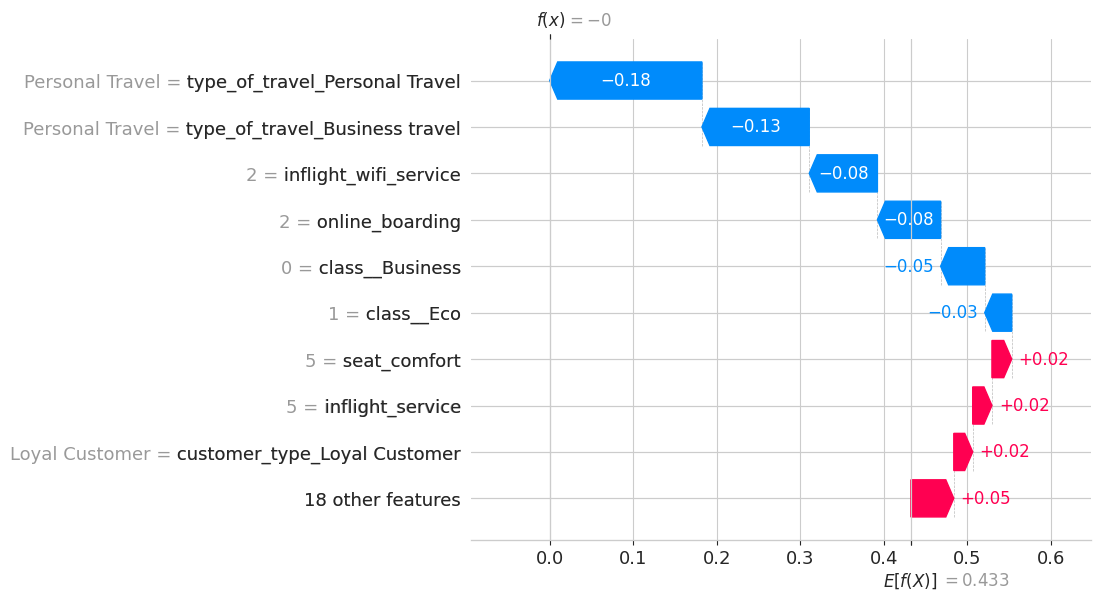


[3.2] Explicando uma previsão incorreta...
 
PASSAGEIRO ÍNDICE=23 | REAL=satisfied | PREVISÃO=neutral or dissatisfied (p=0.930)
 
Gerando gráfico Waterfall para esta previsão...
 


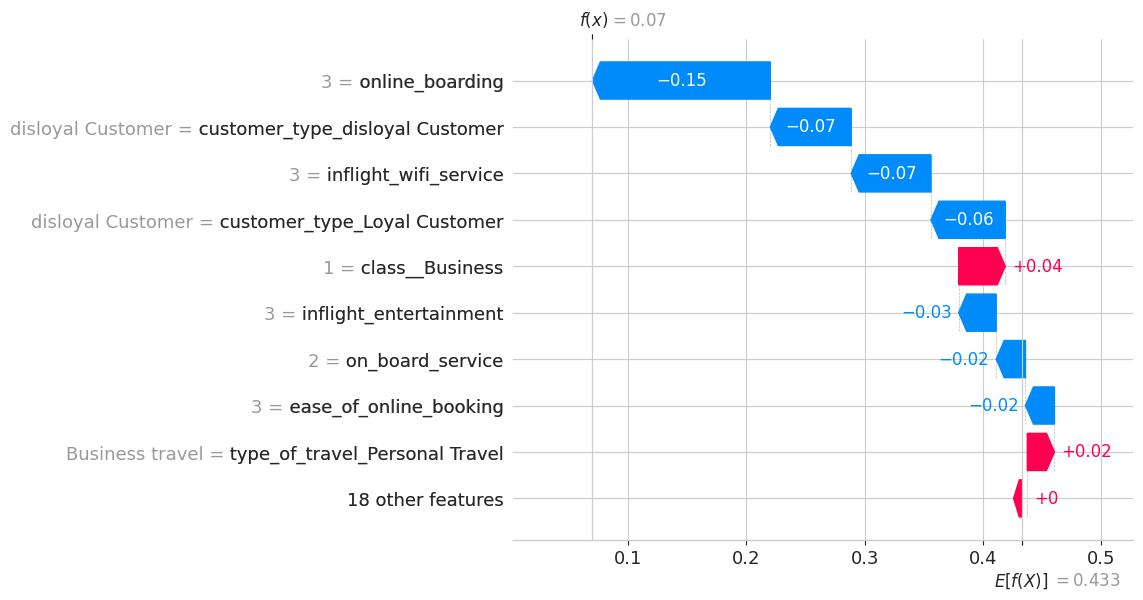

 

  passageiro índice 0
  Linha base = 0.433 (probabilidade média de satisfação)
  Real: neutral or dissatisfied
  Predição do modelo: neutral ou insatisfied (p=1)
  Conclusão: mesmo com variáveis como Loyal Customer, seat_comfort e inflight_service)
  contribuindo (vermelho) para uma boa valiação, variáveis mais críticas (Type_of_travel, inflight_wifi_service,
  online_boarding, ..) puxaram a predição para insatisfação (azul). Confirmando as análise anteriores que
  evidenciaram a influência de algumas variáveis na predição (positiva/negativa).
  
  passageiro índice 23
  Linha base = 0.433
  Real: satisfied
  Predição do modelo: neutral ou insatisfeita (p=0.930)
  Conclusão: Aqui o modelo classificou errado. Neste caso, podemos observar que as notas baixas nas variáveis 
  online_boarding, inflight_wifi_service foram decisivas para derrubar a predição. 



In [ ]:
print("\n--- Análise 3. Explicando Previsões Individuais (Visão Local) ---")
print(" ")

def explain_passenger_pretty(i: int, top_n: int = 12):
    """Explica UMA amostra do X_test (índice i) usando SHAP,
    mostrando valores ORIGINAIS nas labels quando houver mapeamento."""
    # Prepara a linha de dados bruta e transformada
    X_row_raw = X_test.iloc[[i]]
    y_true = y_test.iloc[i]
    X_row_tr = full_pipeline.named_steps["preprocessor"].transform(X_row_raw)
    X_row_dense = X_row_tr.toarray() if hasattr(X_row_tr, "toarray") else X_row_tr

    # Predição do pipeline
    proba = full_pipeline.predict_proba(X_row_raw)[0]
    pred_idx = int(np.argmax(proba))
    pred_lbl = modelo_rf_final.classes_[pred_idx]
    pred_prob = proba[pred_idx]
    print(f"PASSAGEIRO ÍNDICE={i} | REAL={y_true} | PREVISÃO={pred_lbl} (p={pred_prob:.3f})")
    print(" ")

    # SHAP local para a classe positiva
    sv_all = expl.shap_values(X_row_dense)
    if isinstance(sv_all, list):
        sv = sv_all[pos_idx][0]
        base = expl.expected_value[pos_idx]
    else:
        sv = sv_all[0, :, pos_idx]
        base = expl.expected_value[pos_idx]

    # Vetor de exibição com valores originais
    display_vals = X_row_dense[0].astype(object).copy()
    for j, name in enumerate(all_features):
        original_name = collapse_dummy(name)
        if original_name in X_row_raw.columns:
            display_vals[j] = X_row_raw.iloc[0][original_name]

    # Waterfall plot
    print("Gerando gráfico Waterfall para esta previsão...")
    print(" ")
    exp = shap.Explanation(values=sv, base_values=base,
                           data=np.array(display_vals, dtype=object),
                           feature_names=all_features)
    shap.plots.waterfall(exp, max_display=top_n)

# Exemplo: explicar a primeira previsão do conjunto de teste
print("\n[3.1] Explicando uma previsão correta...")
print(" ")
y_pred_test = full_pipeline.predict(X_test)
acertos = np.where(y_pred_test == y_test.values)[0]
if len(acertos) > 0:
    explain_passenger_pretty(i=acertos[0], top_n=10)

print("\n[3.2] Explicando uma previsão incorreta...")
print(" ")
erros = np.where(y_pred_test != y_test.values)[0]
if len(erros) > 0:
    explain_passenger_pretty(i=erros[0], top_n=10)

print(" ")
print("""
  passageiro índice 0
  Linha base = 0.433 (probabilidade média de satisfação)
  Real: neutral or dissatisfied
  Predição do modelo: neutral ou insatisfied (p=1)
  Conclusão: mesmo com variáveis como Loyal Customer, seat_comfort e inflight_service)
  contribuindo (vermelho) para uma boa valiação, variáveis mais críticas (Type_of_travel, inflight_wifi_service,
  online_boarding, ..) puxaram a predição para insatisfação (azul). Confirmando as análise anteriores que
  evidenciaram a influência de algumas variáveis na predição (positiva/negativa).

  passageiro índice 23
  Linha base = 0.433
  Real: satisfied
  Predição do modelo: neutral ou insatisfeita (p=0.930)
  Conclusão: Aqui o modelo classificou errado. Neste caso, podemos observar que as notas baixas nas variáveis
  online_boarding, inflight_wifi_service foram decisivas para derrubar a predição.
""")

### Isolando Efeitos com Dependência Parcial (PDP & ICE)

Como uma análise complementar, os Gráficos de Dependência Parcial (PDP) nos ajudam a visualizar a relação entre uma ou duas variáveis e a predição do modelo, marginalizando o efeito de todas as outras. Já o ICE (Individual Conditional Expectation) nos mostra essa relação para cada instância individual.

#### O que Este Código Faz?

1.  **PDP e ICE Univariado:**

      * Utilizamos a função `PartialDependenceDisplay.from_estimator` para visualizar o efeito de uma única variável.
      * Ao usar `kind="both"`, o gráfico plota a linha do PDP (o efeito médio, em azul) e as linhas do ICE (o efeito para cada observação, em cinza claro). Isso é ótimo para ver se o comportamento médio se aplica a todos os passageiros ou se existem subgrupos com comportamentos diferentes.

2.  **PDP Bivariado (Interações):**

      * Geramos um PDP 2D para um par de variáveis. O resultado é um mapa de calor que mostra como a probabilidade de satisfação muda à medida que os valores das duas variáveis mudam simultaneamente, sendo uma forma explícita de visualizar interações.



--- Análise 4: Isolando Efeitos com Dependência Parcial (PDP & ICE) ---
 

[4.1] Gerando gráficos PDP/ICE para 4 variáveis univariadas...
 

--- PDP/ICE para features individuais ---


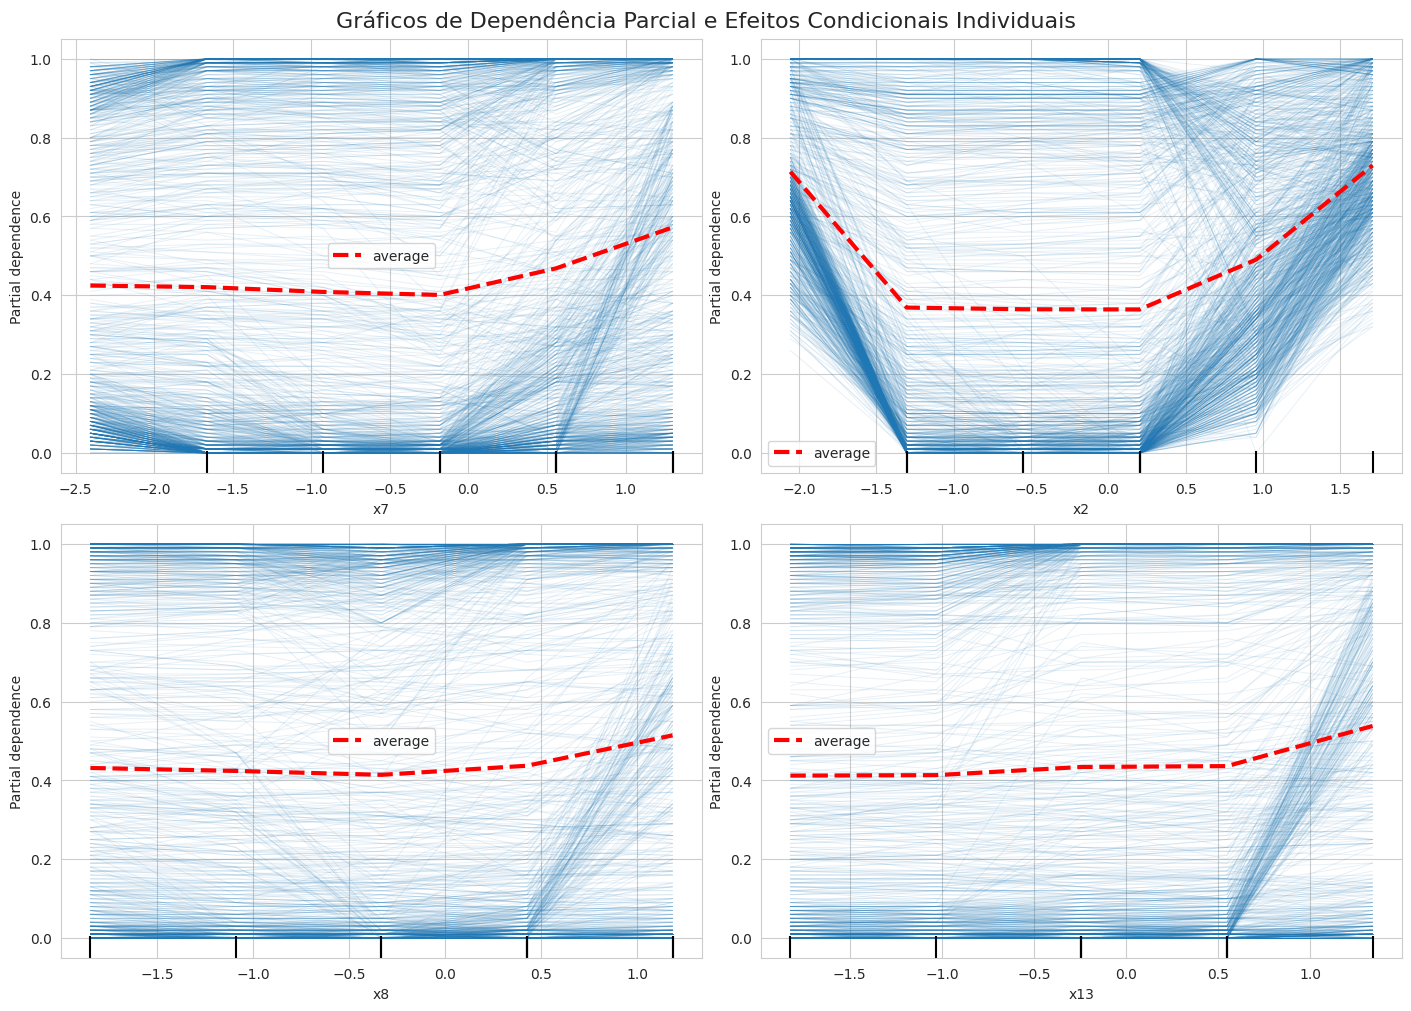

 

--- PDP 2D para Interação entre Variáveis ---
 


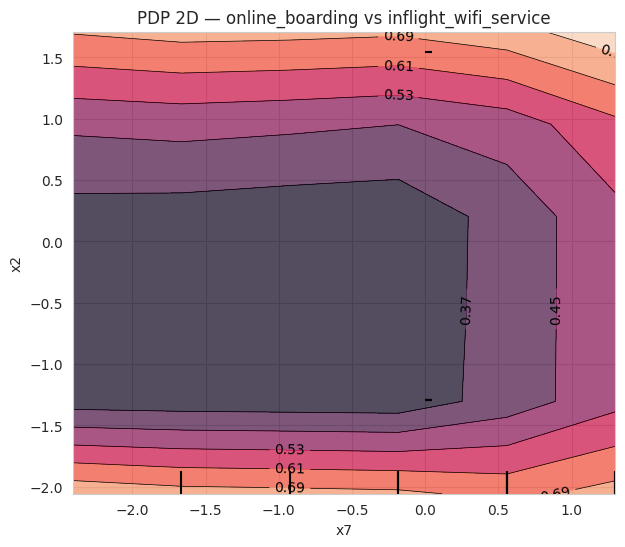


   Variáveis destacadas no SHAP Summary/Permutation: online_boarding, inflight_wifi_service → apareceram no topo da importância.
   Variávesi de interesse de negócio: seat_comfort e checkin_service (escolha da companhia aérea)
   online_boarding (x7): PDP crescente → embarque online bem avaliado aumenta chance de satisfação.
   inflight_wifi_service (x8): padrão semelhante → wifi bom puxa satisfação para cima.
   seat_comfort(x13): impacto positivo, mas mais suave.
   checkin_service(x14): efeito menor, mas consistente.
   PDP 2D (online_boarding × wifi): mostra que quando ambos são altos, a satisfação cresce ainda mais.
   Podemos observar que quando pelo menos uma das variáveis está alta (ex.: boarding alto OU wifi alto), a probabilidade de satisfação sobe.
   Quando as duas estão altas ao mesmo tempo → a região é a mais clara → maior probabilidade prevista. 



In [51]:
print("\n--- Análise 4: Isolando Efeitos com Dependência Parcial (PDP & ICE) ---")
print(" ")

# Usaremos os mesmos dados de teste transformados (X_test_tr_dense)
# e os nomes das features (all_features)
# A classe alvo é o índice da classe positiva (pos_idx)

# Helper para pegar o índice da coluna transformada pelo nome
def fidx(name: str) -> int:
    try:
        return list(all_features).index(name)
    except ValueError:
        raise ValueError(f"Coluna '{name}' não encontrada.")

# Features a serem analisadas
univariadas = [
    "online_boarding",
    "inflight_wifi_service",
    "seat_comfort",
    "checkin_service",
]
par_2d = ("online_boarding", "inflight_wifi_service")
print("\n[4.1] Gerando gráficos PDP/ICE para 4 variáveis univariadas...")
print(" ")

# --- PDP+ICE univariado (4 painéis) ---
print("\n--- PDP/ICE para features individuais ---")
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)
for ax, name in zip(axes.ravel(), univariadas):
    PartialDependenceDisplay.from_estimator(
        modelo_rf_final, X_test_tr_dense, [fidx(name)],
        kind="both",             # 'average' (PDP), 'individual' (ICE) ou 'both'
        target=pos_idx,          # classe "satisfied"
        grid_resolution=30,
        ice_lines_kw={"alpha": 0.1, "linewidth": 0.7},
        pd_line_kw={"linewidth": 3, "color": "red"},
        ax=ax
    )
    ax.set_title(f"PDP/ICE — {name}")
    ax.set_xlabel(name)
    ax.set_ylabel("Probabilidade de Satisfação")
plt.suptitle("Gráficos de Dependência Parcial e Efeitos Condicionais Individuais", fontsize=16)
plt.show()

# --- PDP 2D (par de variáveis) ---
print(" ")
print("\n--- PDP 2D para Interação entre Variáveis ---")
print(" ")
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
PartialDependenceDisplay.from_estimator(
    modelo_rf_final, X_test_tr_dense, [(fidx(par_2d[0]), fidx(par_2d[1]))],
    kind="average", # 2D só mostra o PDP médio
    target=pos_idx,
    grid_resolution=20,
    ax=ax
)
ax.set_title(f"PDP 2D — {par_2d[0]} vs {par_2d[1]}")
plt.show()

print("""
   Variáveis destacadas no SHAP Summary/Permutation: online_boarding, inflight_wifi_service → apareceram no topo da importância.
   Variávesi de interesse de negócio: seat_comfort e checkin_service (escolha da companhia aérea)
   online_boarding (x7): PDP crescente → embarque online bem avaliado aumenta chance de satisfação.
   inflight_wifi_service (x8): padrão semelhante → wifi bom puxa satisfação para cima.
   seat_comfort(x13): impacto positivo, mas mais suave.
   checkin_service(x14): efeito menor, mas consistente.
   PDP 2D (online_boarding × wifi): mostra que quando ambos são altos, a satisfação cresce ainda mais.
   Podemos observar que quando pelo menos uma das variáveis está alta (ex.: boarding alto OU wifi alto), a probabilidade de satisfação sobe.
   Quando as duas estão altas ao mesmo tempo → a região é a mais clara → maior probabilidade prevista.
""")

In [ ]:
# ==== GERAR RELATÓRIO XAI AUTOMÁTICO ====
from datetime import datetime
import pandas as pd
import atexit
from pathlib import Path

def _df_to_md(df: pd.DataFrame, title: str, n: int = 10) -> str:
    if isinstance(df, pd.DataFrame) and not df.empty:
        return f"### {title}\n\n" + df.head(n).to_markdown(index=False) + "\n\n"
    return f"### {title}\n\n*(dados não disponíveis no ambiente)*\n\n"

def generate_xai_report(
    mdi_agg=None,
    perm_teste=None,
    out_path: str = "relatorio_xai.md",
    perm_metric_name: str | None = None
) -> str:
    """Gera / atualiza o relatório Markdown de XAI com os objetos já existentes no notebook."""
    now = datetime.now().strftime("%Y-%m-%d %H:%M")
    title = "# Relatório de Explicabilidade (XAI) — Classificação de Satisfação de Passageiros\n"
    intro = (
        f"_Gerado em {now}_\n\n"
        "Resumo das análises **MDI**, **Permutation Importance**, **SHAP (summary, dependence e local)** "
        "e **PDP/ICE** realizadas neste notebook.\n\n"
    )
    executive = (
        "## Resumo Executivo\n\n"
        "- **Experiência digital** lidera: **online_boarding** e **inflight_wifi_service**.\n"
        "- **Perfil do passageiro** é decisivo: **Business Travel**, **Loyal Customer** e **Classe Business** aumentam satisfação; "
        "**Personal Travel**, **Disloyal Customer** e **Classe Economy** reduzem.\n"
        "- **Serviços de bordo** (conforto, entretenimento, check-in) têm impacto positivo moderado.\n"
        "- **Baixa relevância**: idade, atrasos e portão de embarque.\n\n"
    )

    # MDI
    mdi_section = (
        "## MDI — Mean Decrease in Impurity\n\n"
        "Indicador interno do RF (sanity check) agregado por variável original (somando dummies do OHE).\n\n"
        + _df_to_md(mdi_agg, "Top variáveis por MDI (agregado)", 10)
    )

    # Permutation
    metric_alias = perm_metric_name or "métrica escolhida"
    if isinstance(perm_teste, pd.DataFrame) and "metric" in perm_teste.columns and pd.notna(perm_teste["metric"]).any():
        metric_alias = str(perm_teste.loc[pd.notna(perm_teste["metric"]), "metric"].iloc[0])
    perm_section = (
        "## Permutation Importance\n\n"
        "Impacto **real** na performance ao embaralhar uma variável nos **dados de teste**.\n\n"
        f"Métrica utilizada: **{metric_alias}**.\n\n"
        + _df_to_md(perm_teste, "Top variáveis por queda média na métrica (importance_mean)", 10)
        + "### Interpretação destacada\n"
          "- **type_of_travel** e **inflight_wifi_service** sustentam a acurácia; são drivers fundamentais.\n"
          "- **food_and_drink** e **arrival_delay_in_minutes** tiveram impacto desprezível.\n\n"
    )

    # SHAP
    shap_section = (
        "## SHAP — Summary & Dependence\n\n"
        "- Valores SHAP **positivos** → puxam para **satisfied**; **negativos** → **neutral/unsatisfied**.\n"
        "- **Wifi** e **Online boarding**: notas altas aumentam satisfação; notas baixas reduzem.\n"
        "- **Type of travel**: *Business* ↑; *Personal* ↓. **Class**: *Business* ↑; *Eco* ↓. "
        "**Customer type**: *Loyal* ↑; *Disloyal* ↓.\n"
        "- **Dependence (online_boarding)**: relação **monotônica crescente**; efeito **mais forte** em *Business Travel*.\n\n"
    )

    # Local & PDP/ICE
    local_section = (
        "## SHAP Local — Waterfall\n\n"
        "- Casos corretos explicados por notas baixas em wifi/boarding; falso negativo mostrou supervalorização de problemas digitais.\n\n"
    )
    pdp_section = (
        "## PDP/ICE\n\n"
        "- **PDP** (tendência média) e **ICE** (variação individual) confirmam efeitos crescentes para boarding e wifi.\n"
        "- **PDP 2D (boarding × wifi)**: efeito conjunto positivo quando ambos estão altos.\n\n"
    )

    limits_section = (
        "## Limitações e Boas Práticas\n\n"
        "- **MDI** é triagem interna (não prova impacto).\n"
        "- **Permutation** depende da métrica e pode ser afetada por **colinearidade** (considere grupos correlacionados).\n"
        "- **SHAP** deve ser lido com a **métrica de negócio** e dados recentes (monitorar drift).\n\n"
    )

    actions_section = (
        "## Recomendações de Ação\n\n"
        "1) Priorizar melhorias em **online boarding** e **inflight wifi**.\n"
        "2) Customizar ofertas por **tipo de viagem** e **fidelidade**.\n"
        "3) Monitorar KPIs de conforto/check-in (impacto moderado, porém consistente).\n"
        "4) Despriorizar fatores de baixo impacto (idade, atrasos, gate) neste contexto.\n\n"
    )

    report = (
        title + intro + executive + mdi_section + perm_section
        + shap_section + local_section + pdp_section + limits_section + actions_section
    )

    Path(out_path).parent.mkdir(parents=True, exist_ok=True)
    Path(out_path).write_text(report, encoding="utf-8")
    print(f"✅ Relatório XAI salvo em: {out_path}")
    return str(out_path)

# Tenta pegar objetos do ambiente (se existirem) e já gerar automaticamente
_mdi = globals().get("mdi_agg", None)
_perm = globals().get("perm_teste", None)
_generate_path = "relatorio_xai.md"
generate_xai_report(_mdi, _perm, out_path=_generate_path)

# (Opcional) fallback: também gera o relatório ao encerrar o kernel
atexit.register(lambda: generate_xai_report(globals().get("mdi_agg"), globals().get("perm_teste"), out_path=_generate_path))
# ==== FIM BLOCO ====


✅ Relatório XAI salvo em: relatorio_xai.md


<function __main__.<lambda>()>